In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
df = pd.read_csv('traffic_data.csv')
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_irc,state_FIN,state_INT,state_CON,state_ECO,state_REQ,state_RST,state_PAR,state_URN,state_no
0,1,51.996680,79,61,1965,8285,593,76,228,85.247950,...,0,0,0,1,0,0,0,0,0,0
1,2,106.840855,4,74,3721,8271,849,24,209,76.853887,...,0,1,0,0,0,0,0,0,0,0
2,3,42.816332,56,93,1229,4193,489,71,135,16.199115,...,0,0,0,1,0,0,0,0,0,0
3,4,57.677020,3,93,2583,3895,725,127,138,13.395319,...,0,0,0,0,1,0,0,0,0,0
4,5,17.776003,33,81,6693,2530,38,178,203,67.994412,...,0,0,0,0,1,0,0,0,0,0


In [5]:
df.shape

(5508, 196)

In [6]:
df.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload',
       ...
       'service_irc', 'state_FIN', 'state_INT', 'state_CON', 'state_ECO',
       'state_REQ', 'state_RST', 'state_PAR', 'state_URN', 'state_no'],
      dtype='object', length=196)

In [7]:
df.isnull().sum()

id           0
dur          0
spkts        0
dpkts        0
sbytes       0
            ..
state_REQ    0
state_RST    0
state_PAR    0
state_URN    0
state_no     0
Length: 196, dtype: int64

#### Filter Protocol Columns

In [8]:
# Select columns that start with 'proto_'
protocol_columns = [col for col in df.columns if col.startswith('proto_')]

# Sum the occurrences of each protocol across rows (assuming binary encoding: 1 for present, 0 for absent)
protocol_counts = df[protocol_columns].sum().sort_values(ascending=False)

# Show the protocol counts
print(protocol_counts)


proto_ippc           60
proto_wb-mon         56
proto_sdrp           54
proto_any            54
proto_scps           54
                     ..
proto_vmtp           30
proto_idpr-cmtp      29
proto_compaq-peer    29
proto_rvd            29
proto_il             25
Length: 133, dtype: int64


#### Identify the Top 10 Protocols by Traffic

In [9]:
import matplotlib.pyplot as plt

# Group by 'protocol' and calculate total traffic (sent + received bytes)
traffic_by_protocol = df.groupby('id')[['sbytes', 'dbytes']].sum()
traffic_by_protocol['total_traffic'] = traffic_by_protocol['sbytes'] + traffic_by_protocol['dbytes']

# Sort protocols by total traffic in descending order and select the top 10
top_10_protocols = traffic_by_protocol.sort_values(by='total_traffic', ascending=False).head(10)

# Display the top 10 protocols (optional for verification)
print(top_10_protocols)


      sbytes  dbytes  total_traffic
id                                 
3333   48983   49276          98259
768    48081   46338          94419
2061   48949   45358          94307
1131   43355   49519          92874
5293   47472   44620          92092
2866   47128   44820          91948
1240   45720   44723          90443
2635   42816   47460          90276
3216   44784   45461          90245
2969   41418   48394          89812


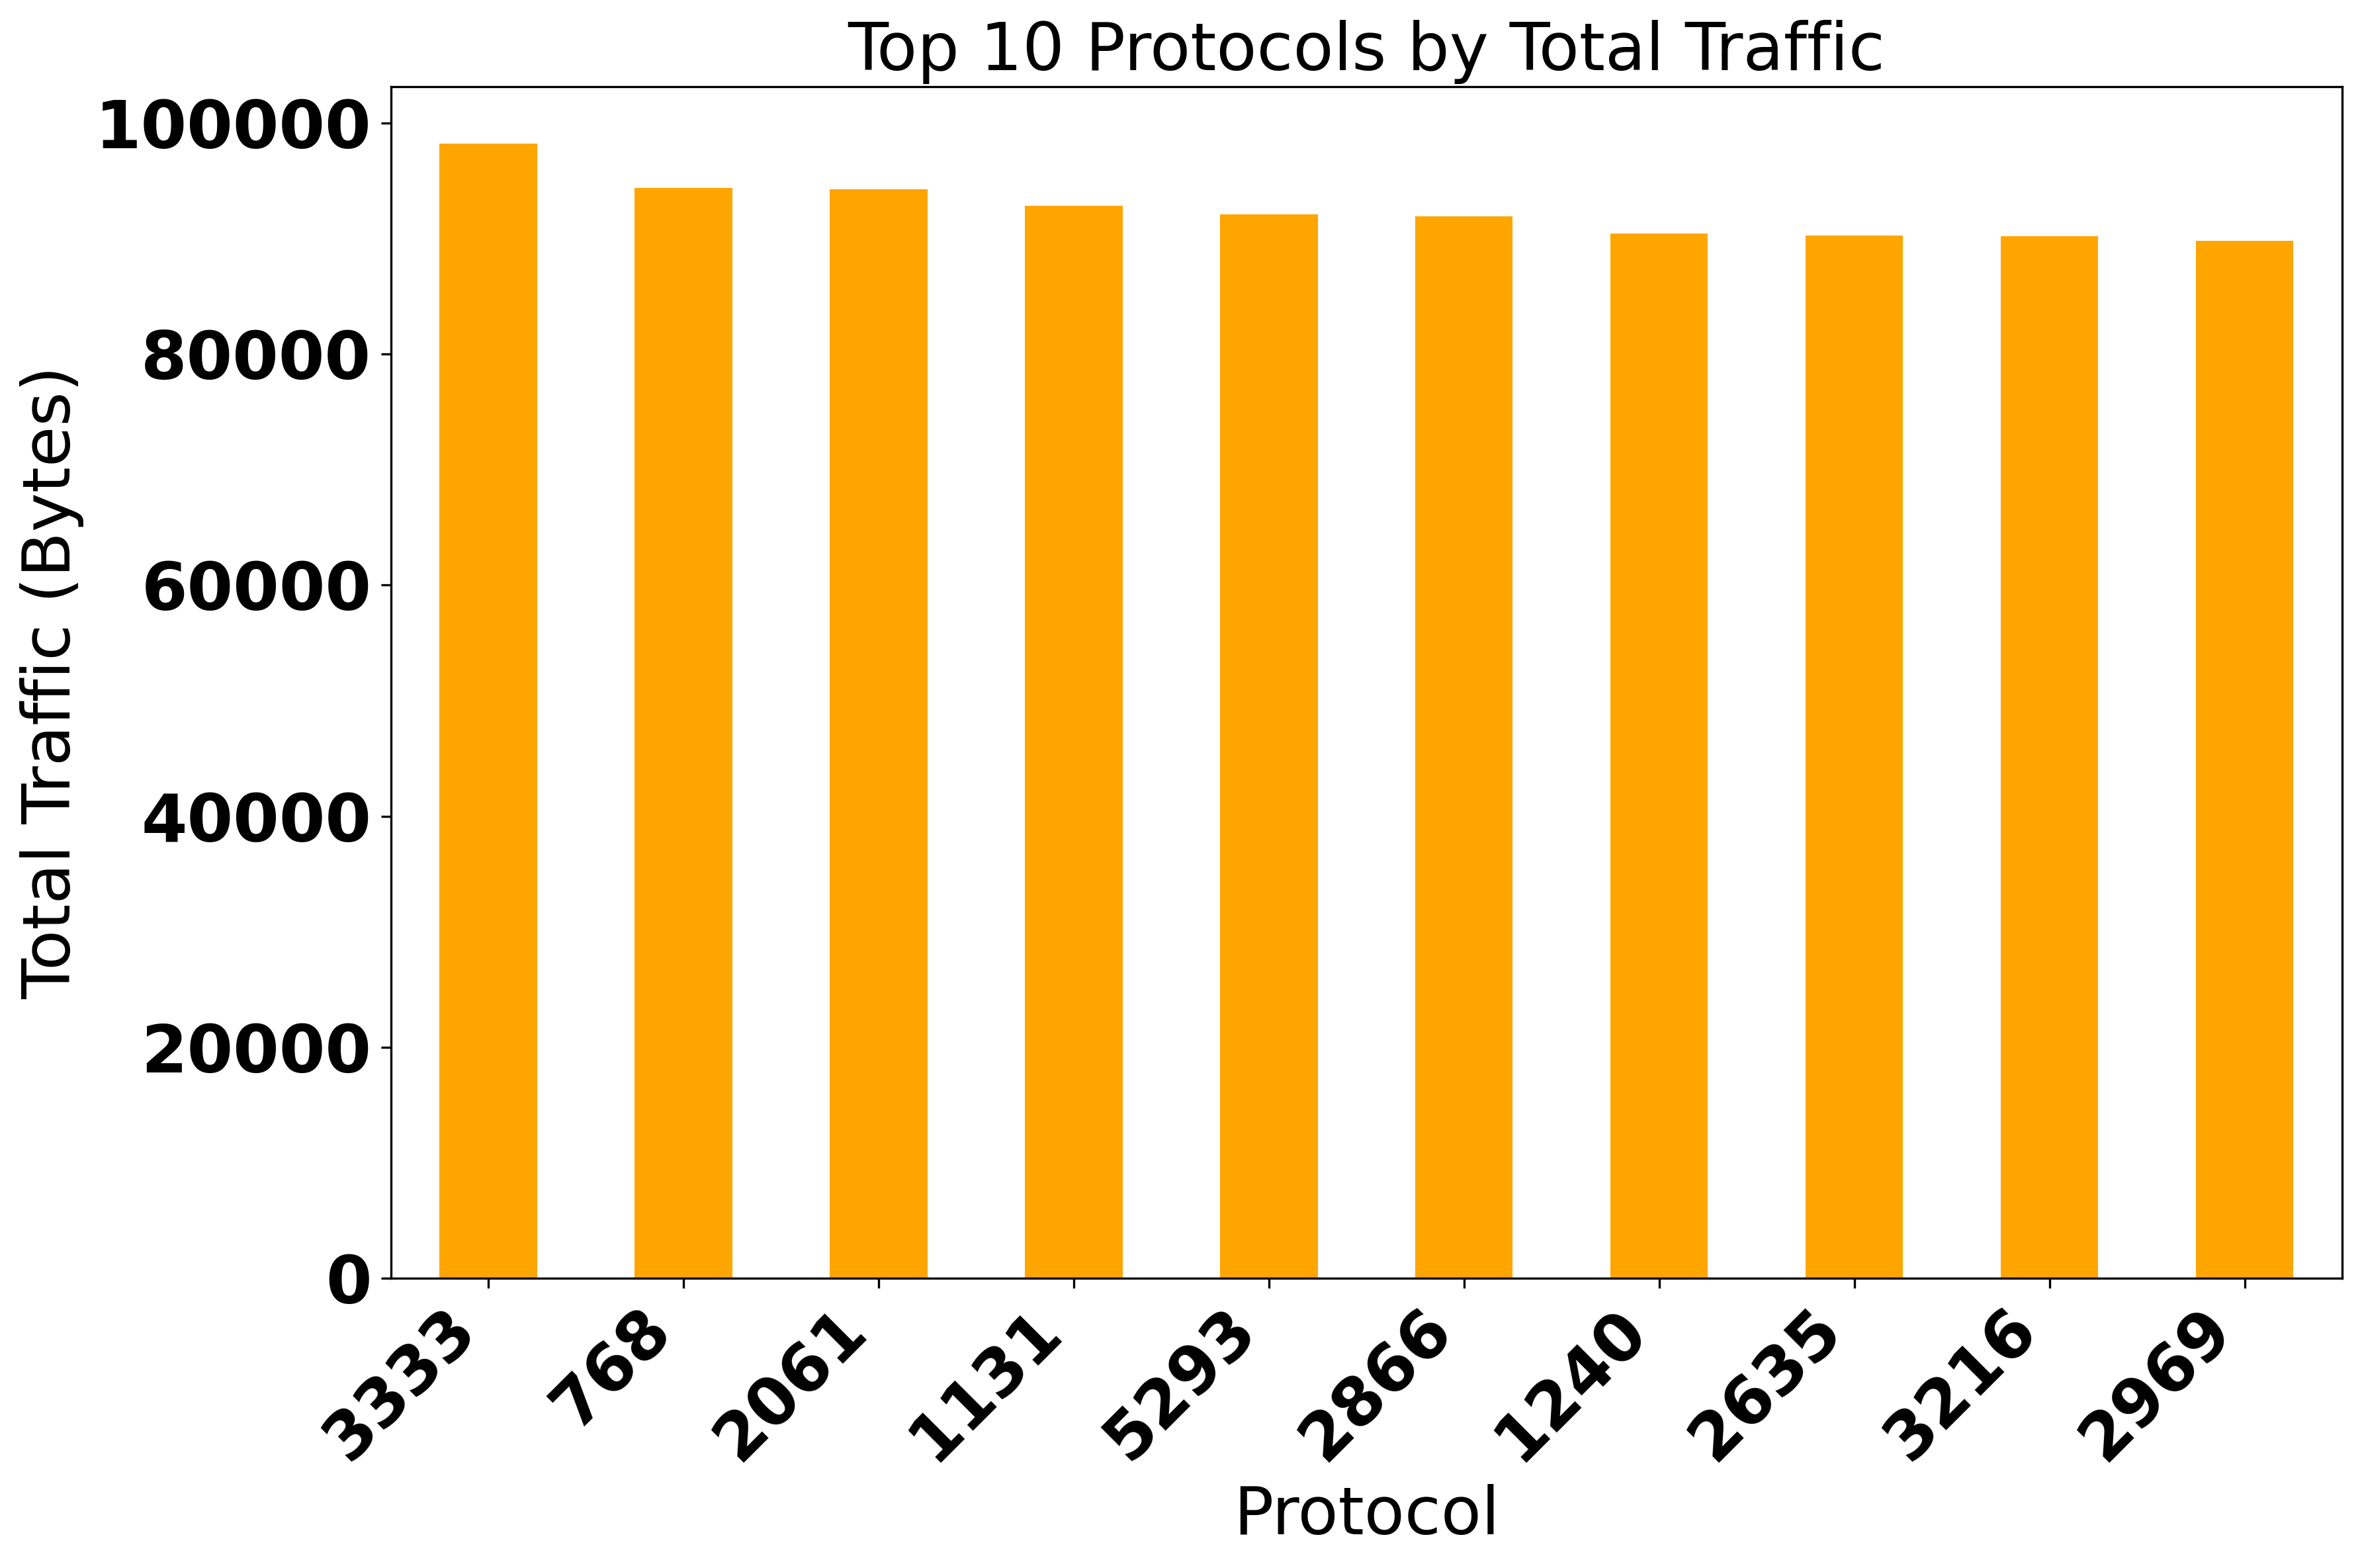

In [10]:
import matplotlib.pyplot as plt

# Set plot settings
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['font.weight'] = 'bold'

# Create the bar plot
plt.figure(figsize=(12, 8))
top_10_protocols['total_traffic'].plot(kind='bar', color='orange')
plt.title('Top 10 Protocols by Total Traffic')
plt.xlabel('Protocol')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('top_10_protocols_traffic.png')
plt.show()


protocol traffic volume Analysis

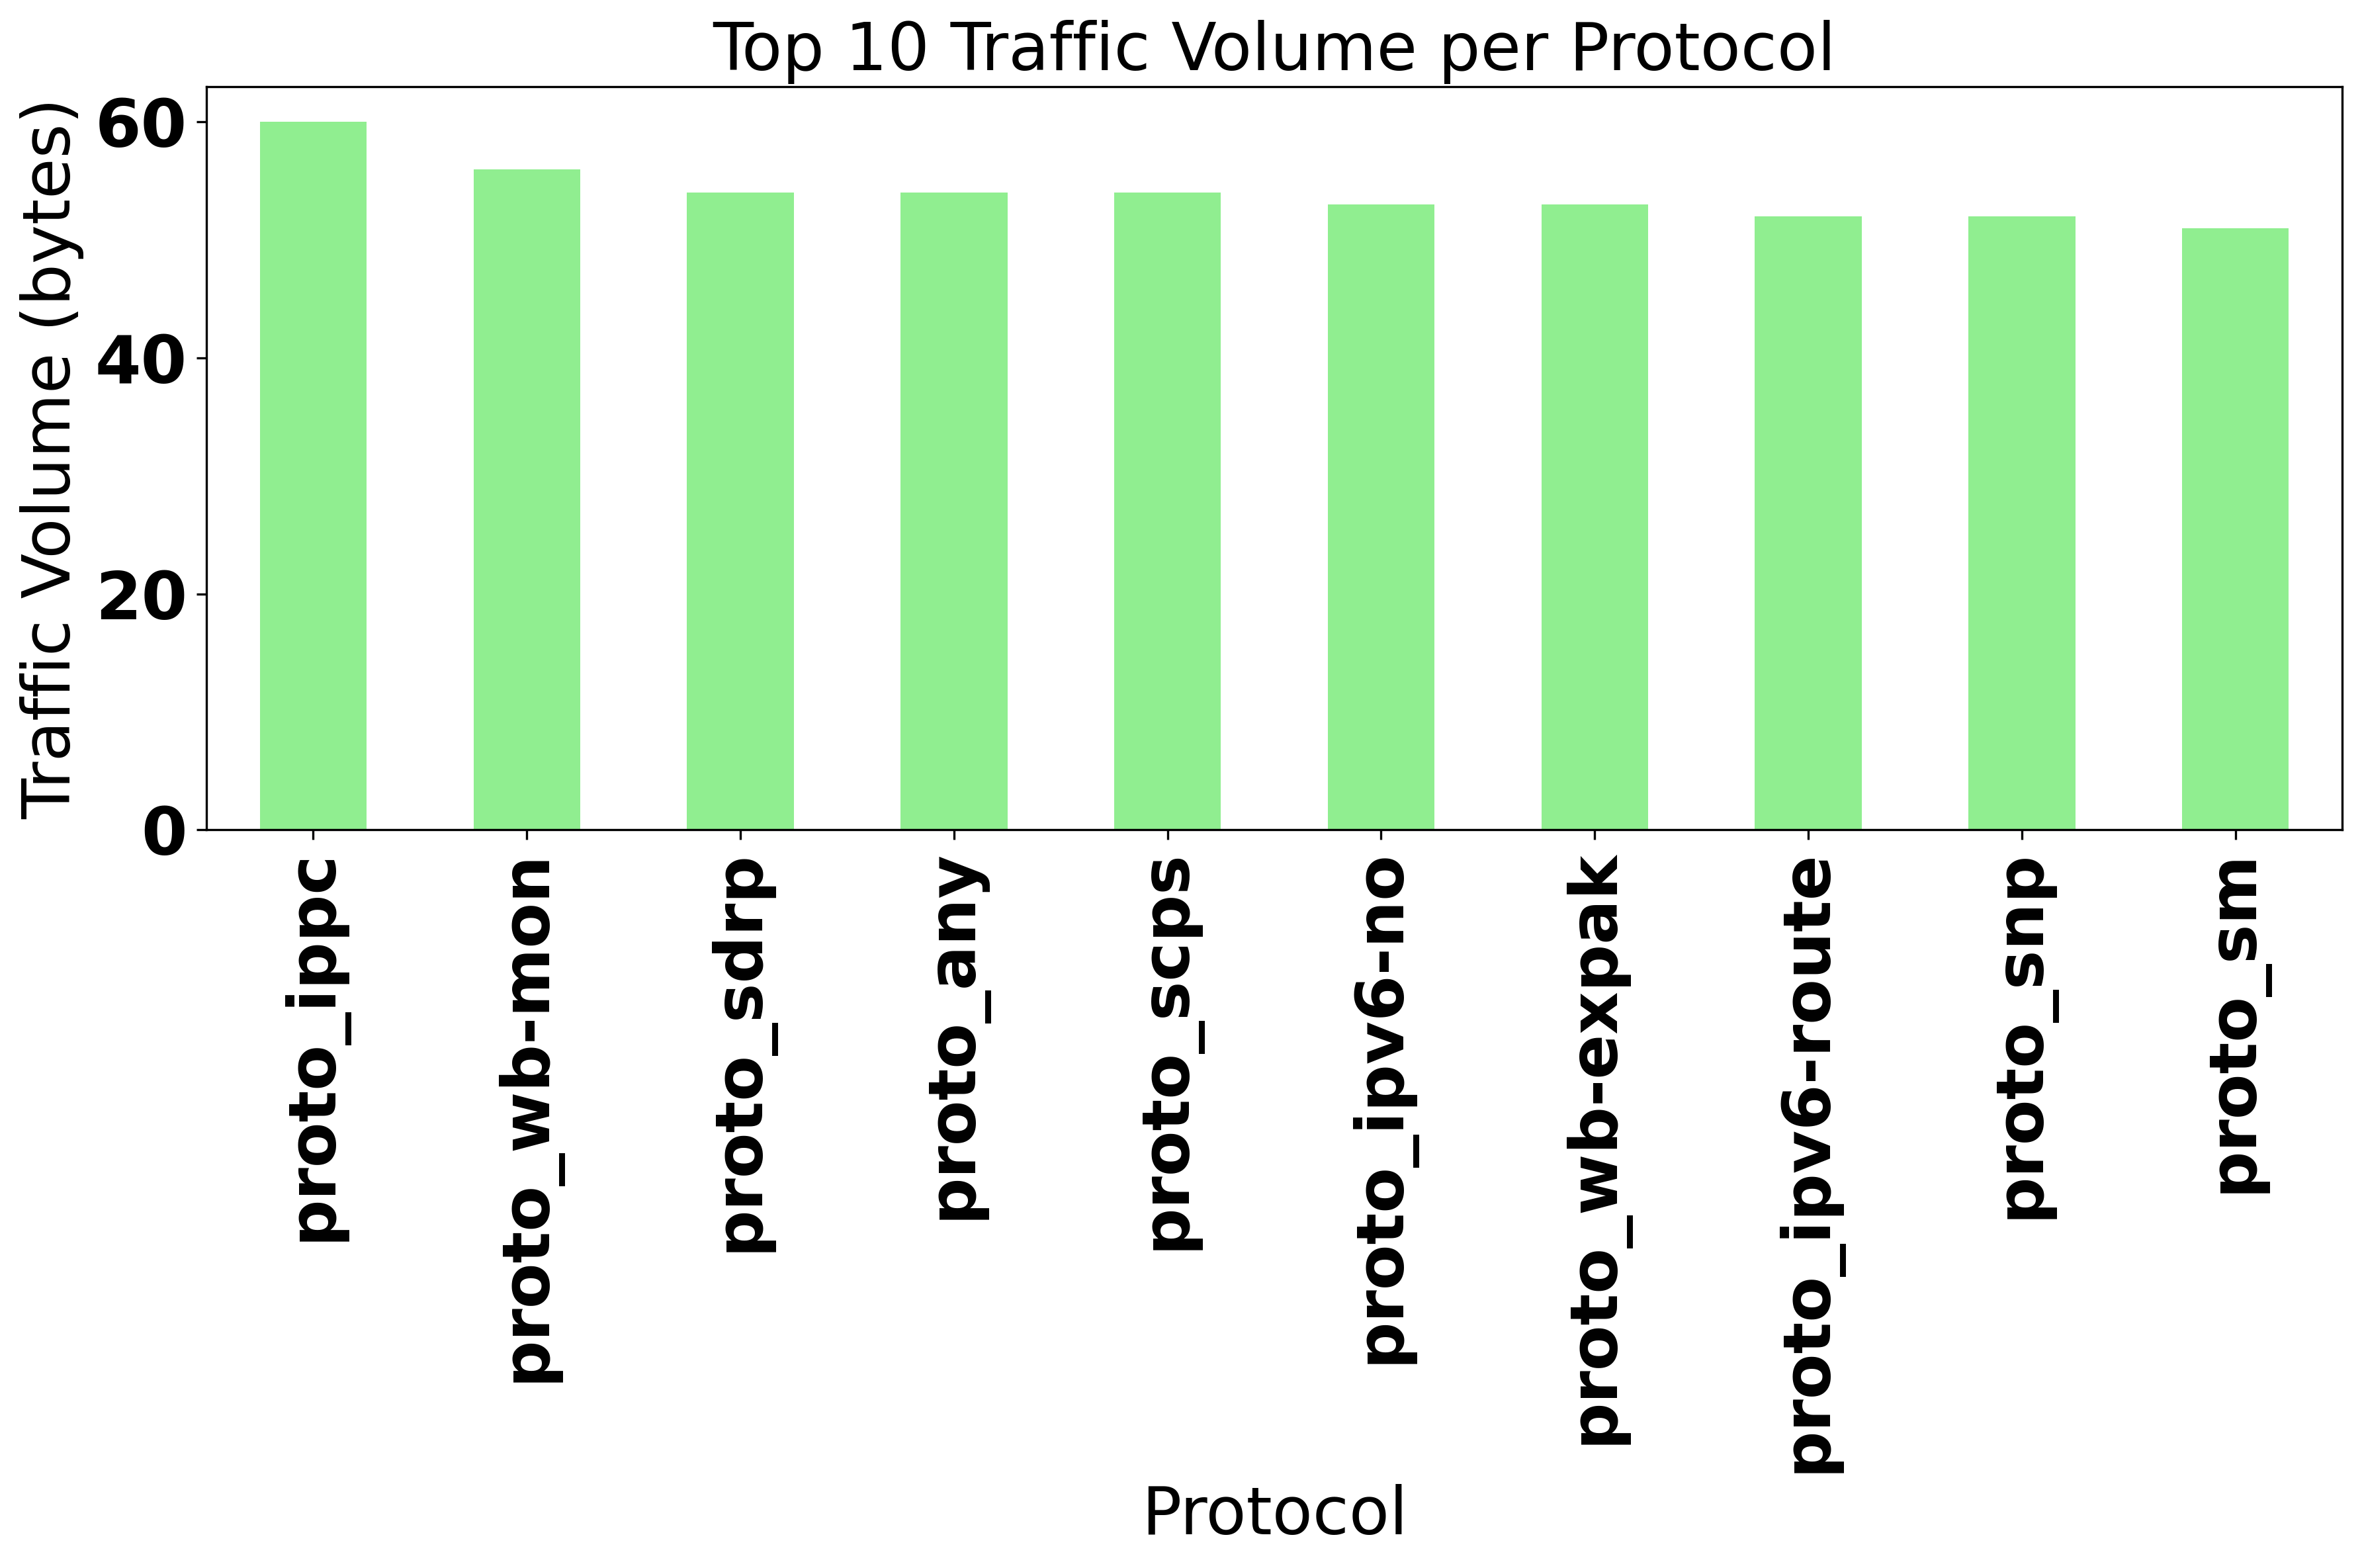

In [11]:
# Sum the total traffic for each protocol (both sent and received)
protocol_traffic = df[protocol_columns].sum(axis=0)

# Get the top 10 highest traffic protocols
top_10_protocols = protocol_traffic.sort_values(ascending=False).head(10)

# Plot the protocol traffic
plt.figure(figsize=(12, 8))
top_10_protocols.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Traffic Volume per Protocol')
plt.xlabel('Protocol')
plt.ylabel('Traffic Volume (bytes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('protocol_traffic_volume.png')
plt.show()


### Network Loss Analysis

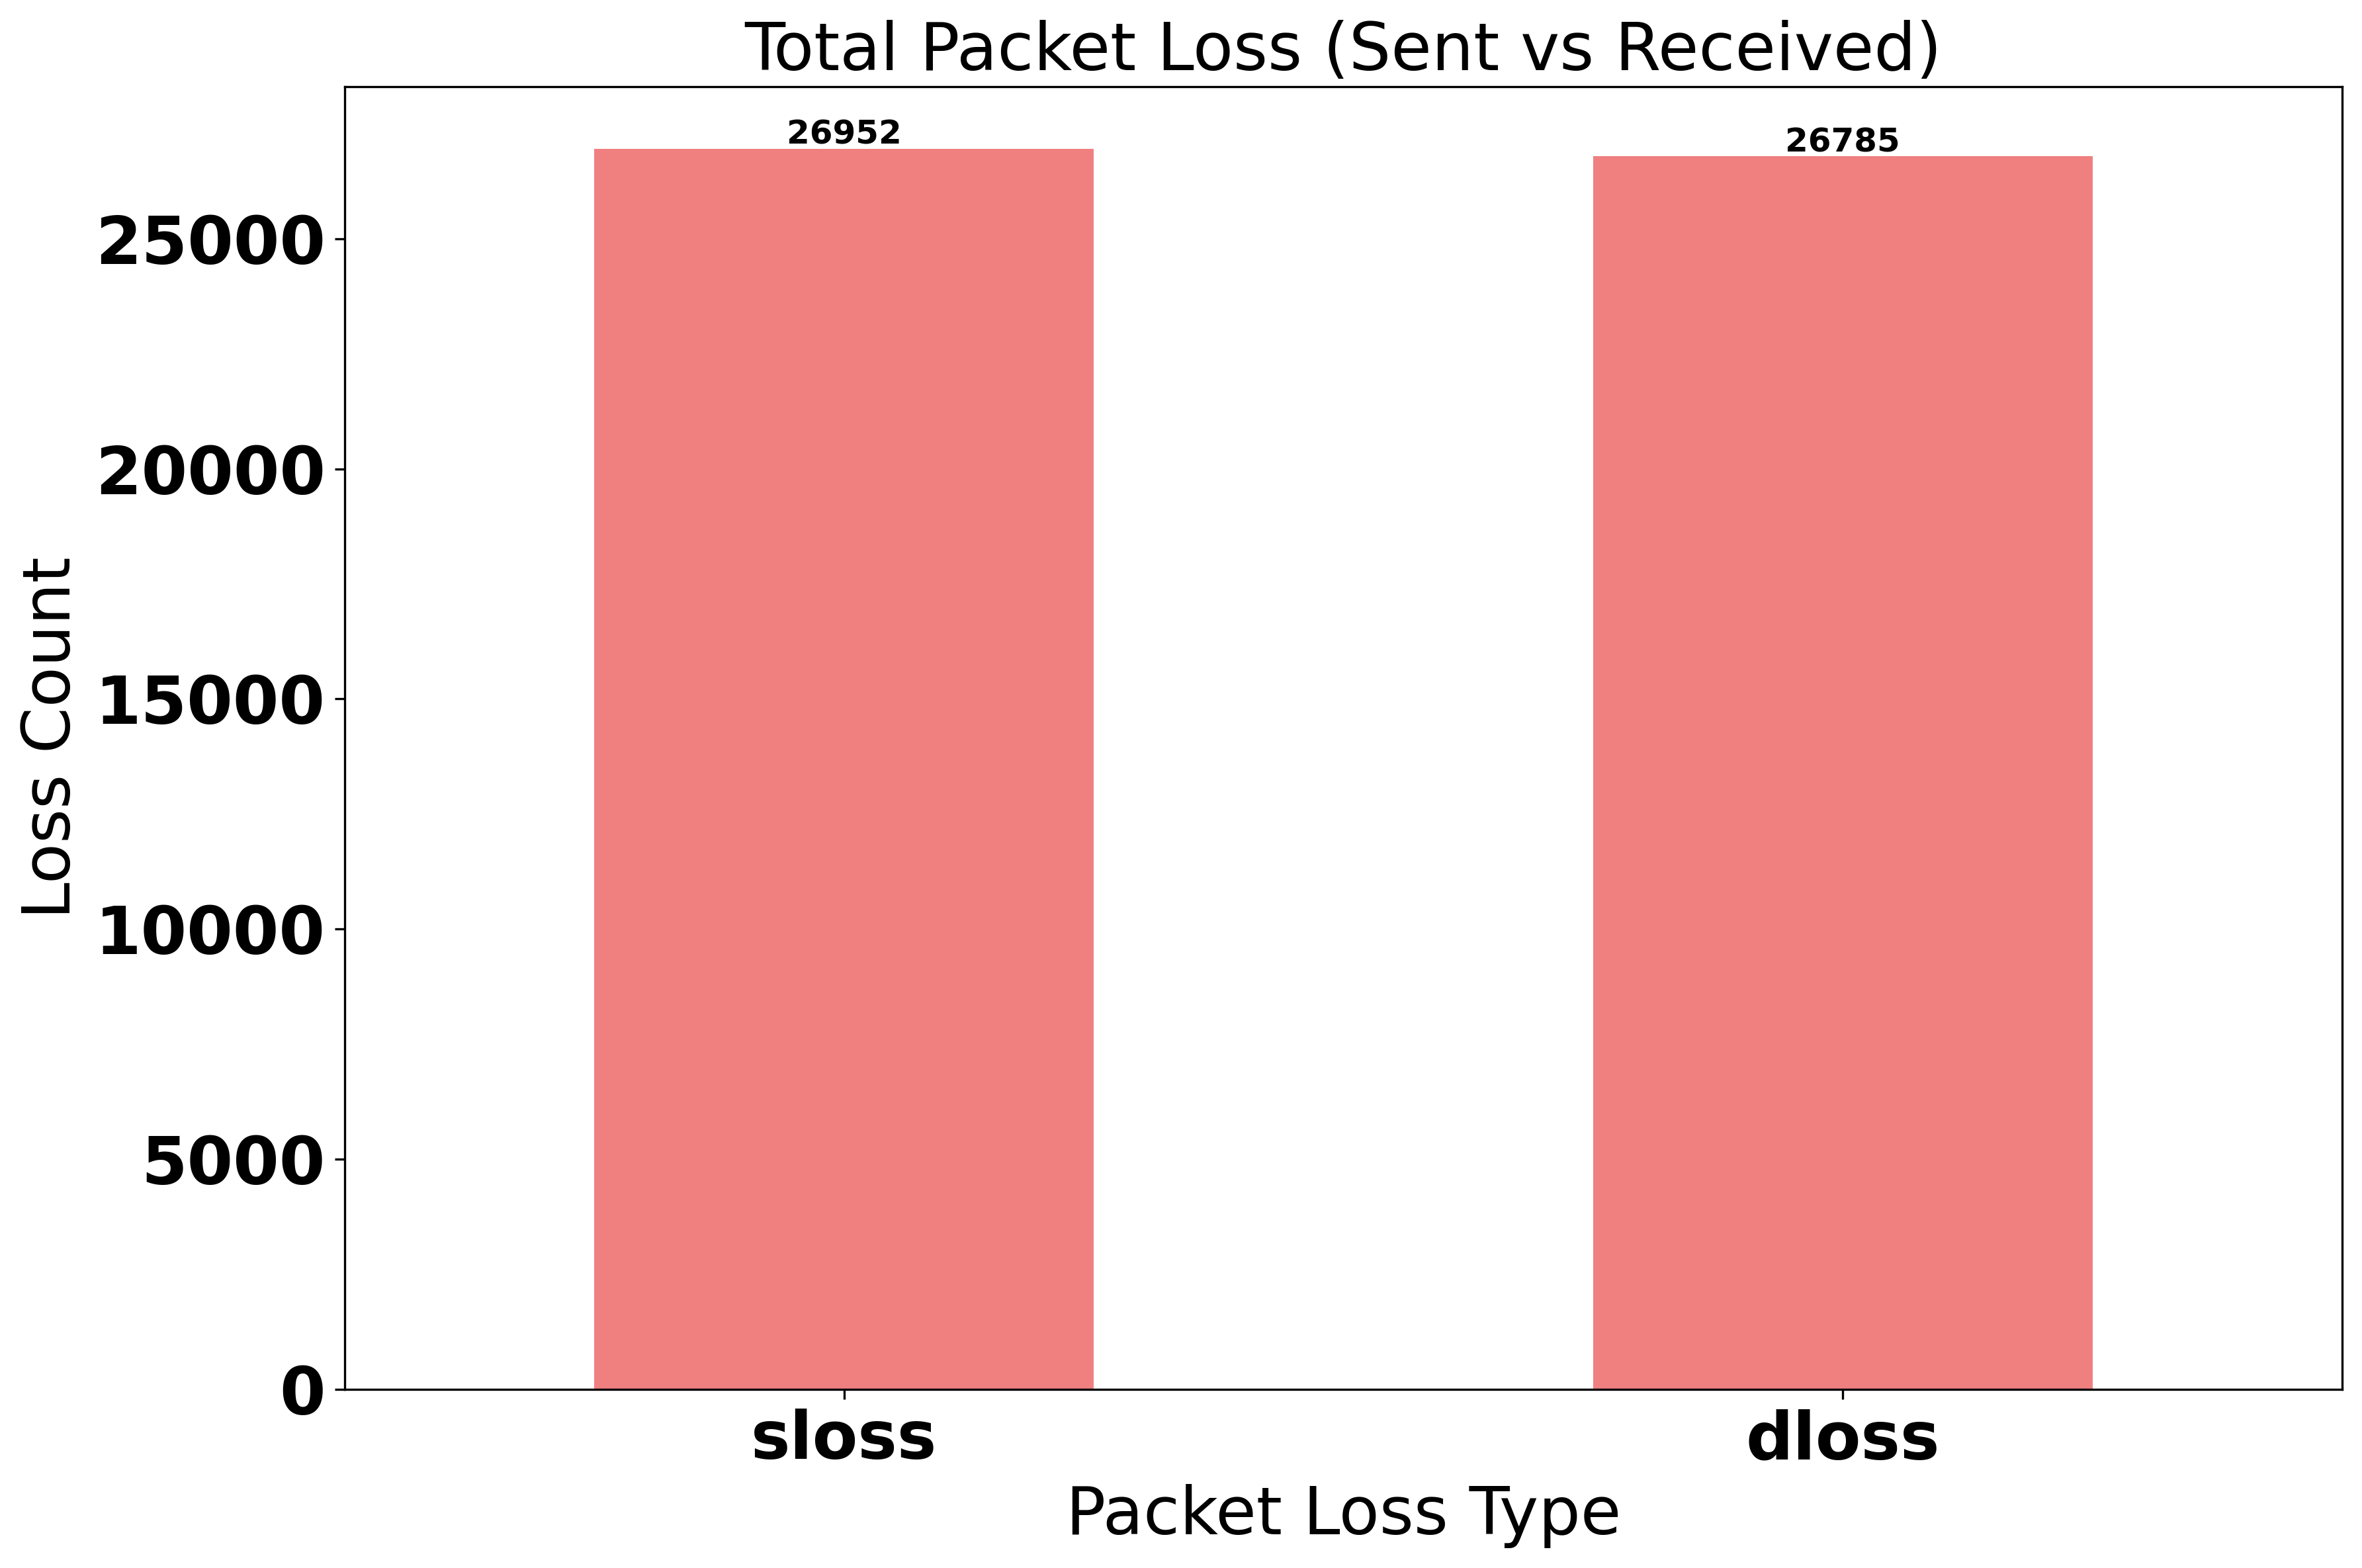

In [12]:


# Assuming df is your DataFrame
loss_columns = ['sloss', 'dloss']  # Sent and received packet loss columns
loss_data = df[loss_columns].sum()

# Create a bar plot for packet loss
plt.figure(figsize=(12, 8))
ax = loss_data.plot(kind='bar', color='lightcoral')
plt.title('Total Packet Loss (Sent vs Received)')
plt.xlabel('Packet Loss Type')
plt.ylabel('Loss Count')
plt.xticks(rotation=0)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig('packet_loss.png')
plt.show()



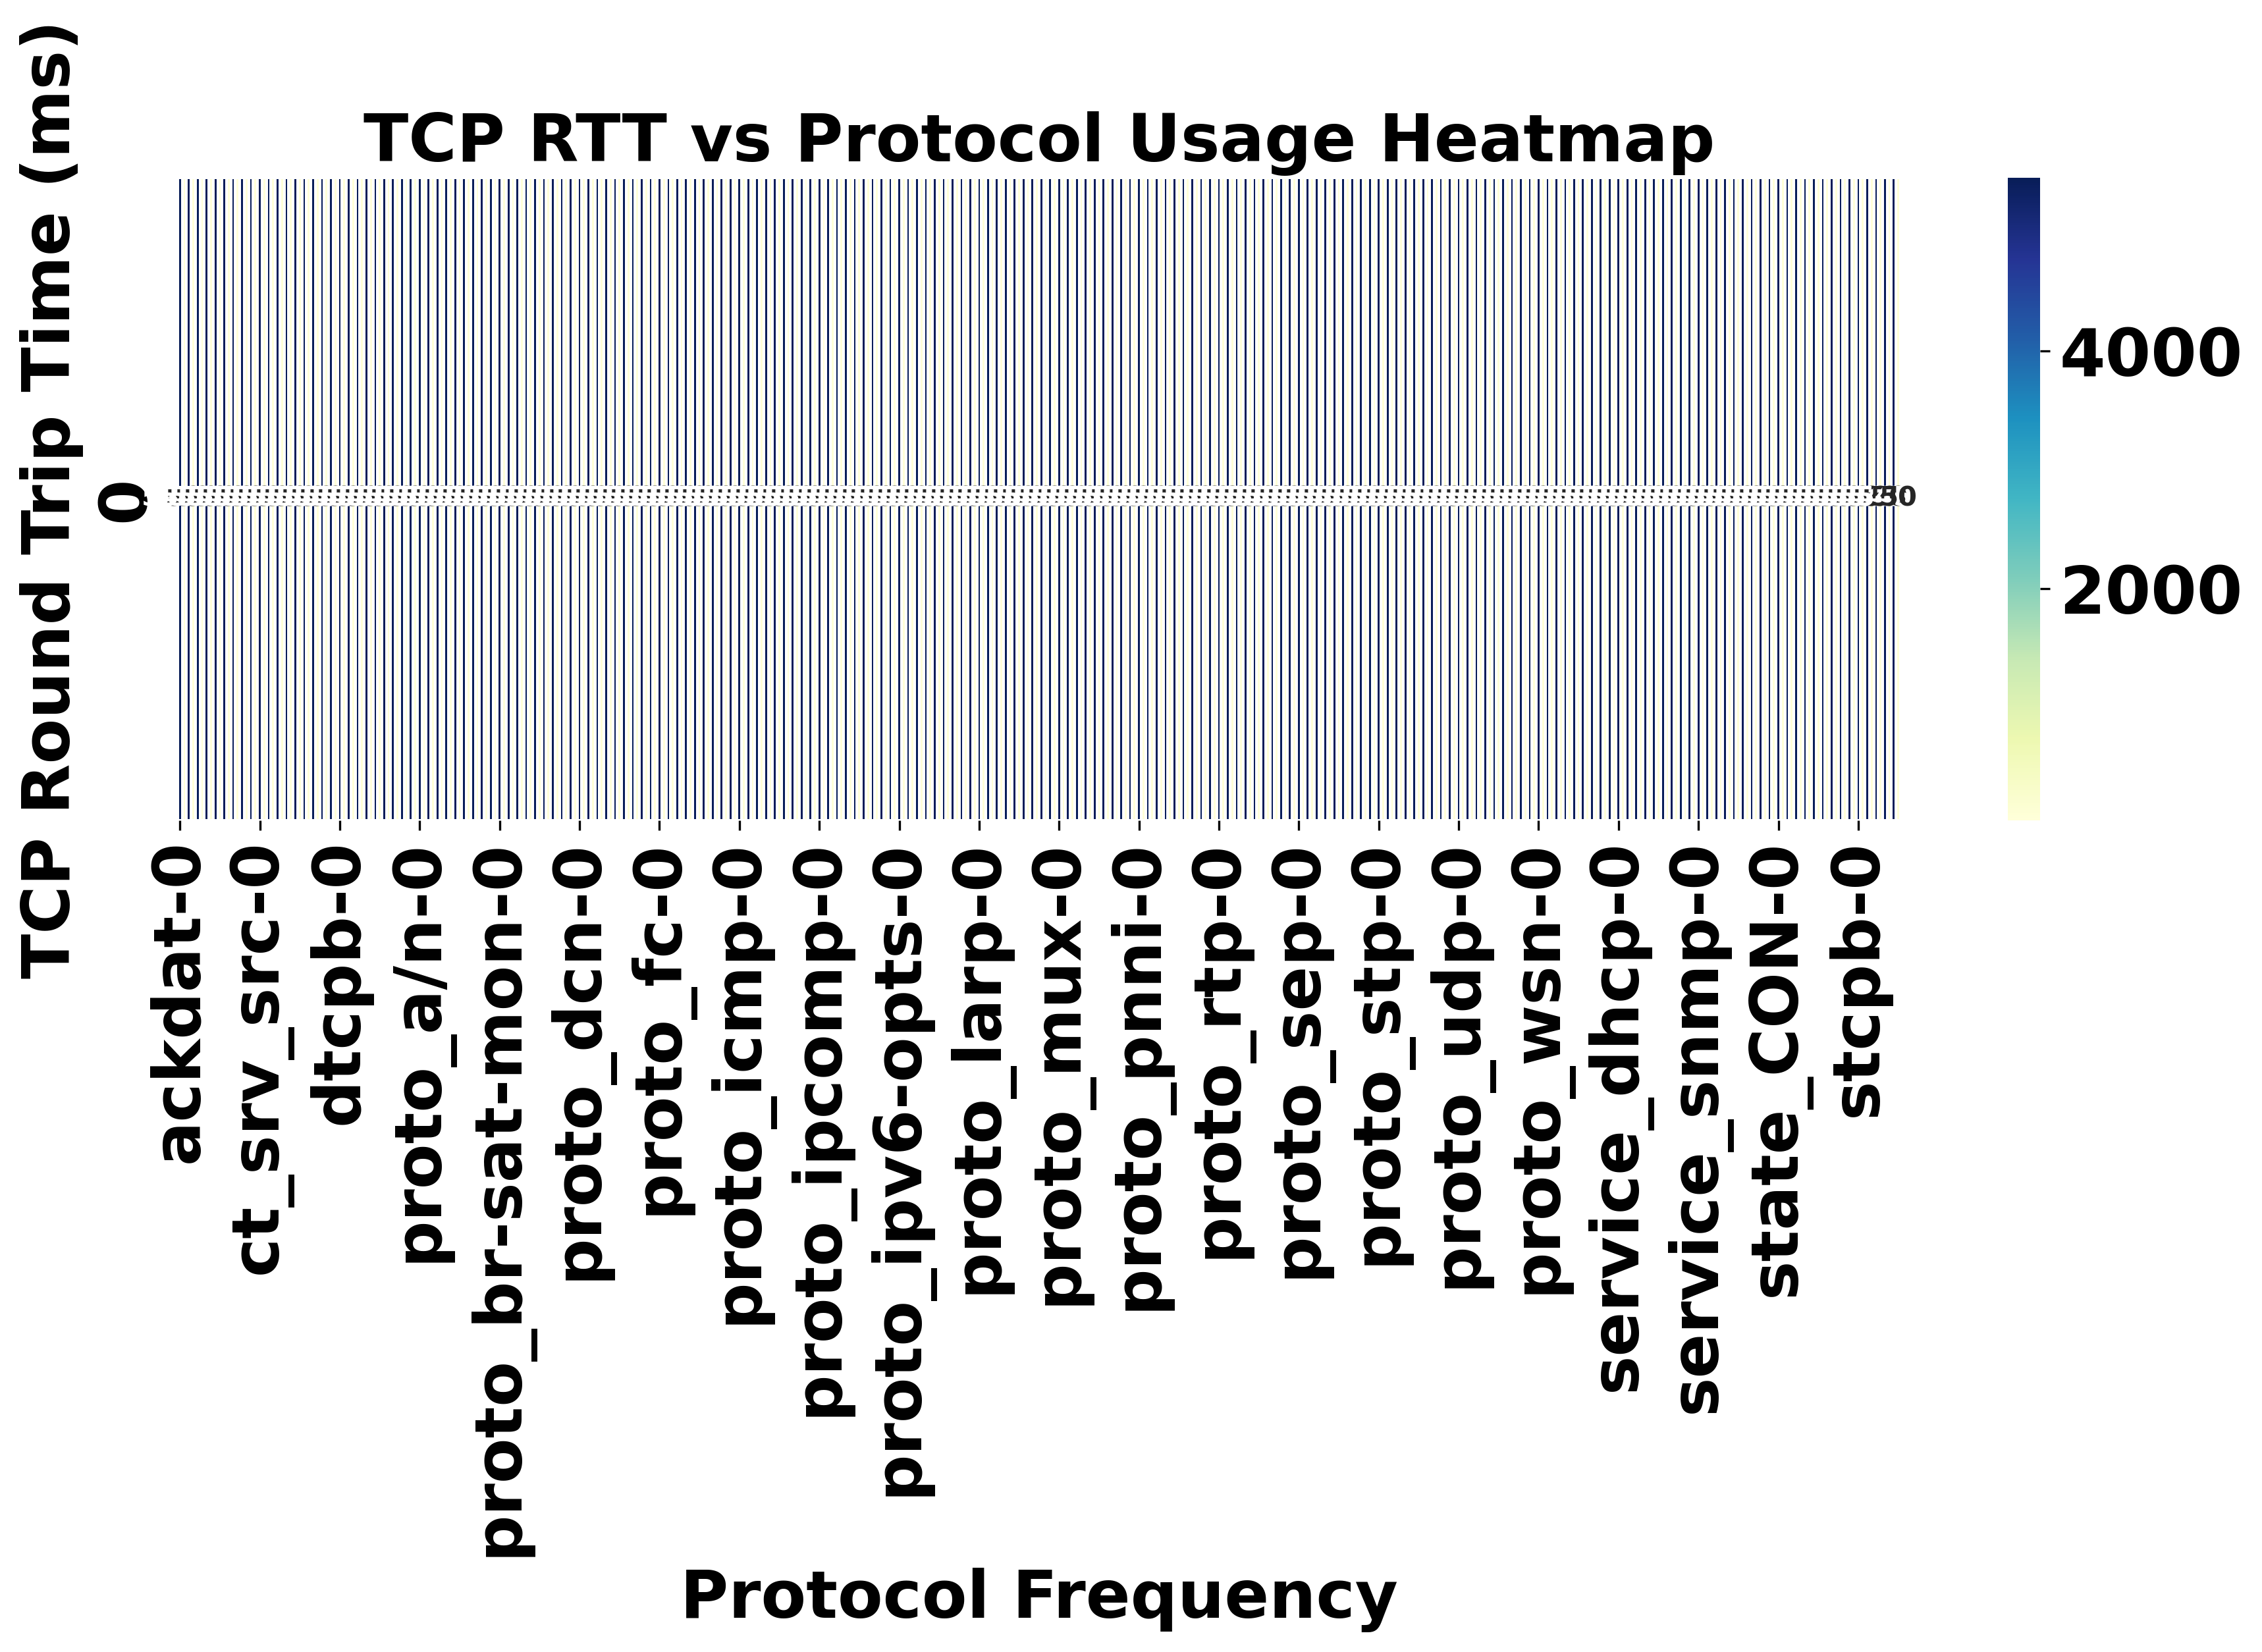

In [13]:
# Assuming df is your DataFrame
# First, we create a pivot table for heatmap, grouping by TCP RTT and protocol usage
heatmap_data = df.pivot_table(index='tcprtt', columns=protocol_columns[0], aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('TCP RTT vs Protocol Usage Heatmap', fontsize=24, fontweight='bold')
plt.xlabel('Protocol Frequency', fontsize=24, fontweight='bold')
plt.ylabel('TCP Round Trip Time (ms)', fontsize=24, fontweight='bold')
plt.tight_layout()
plt.savefig('tcp_rtt_vs_protocol_heatmap.png', dpi=300)
plt.show()


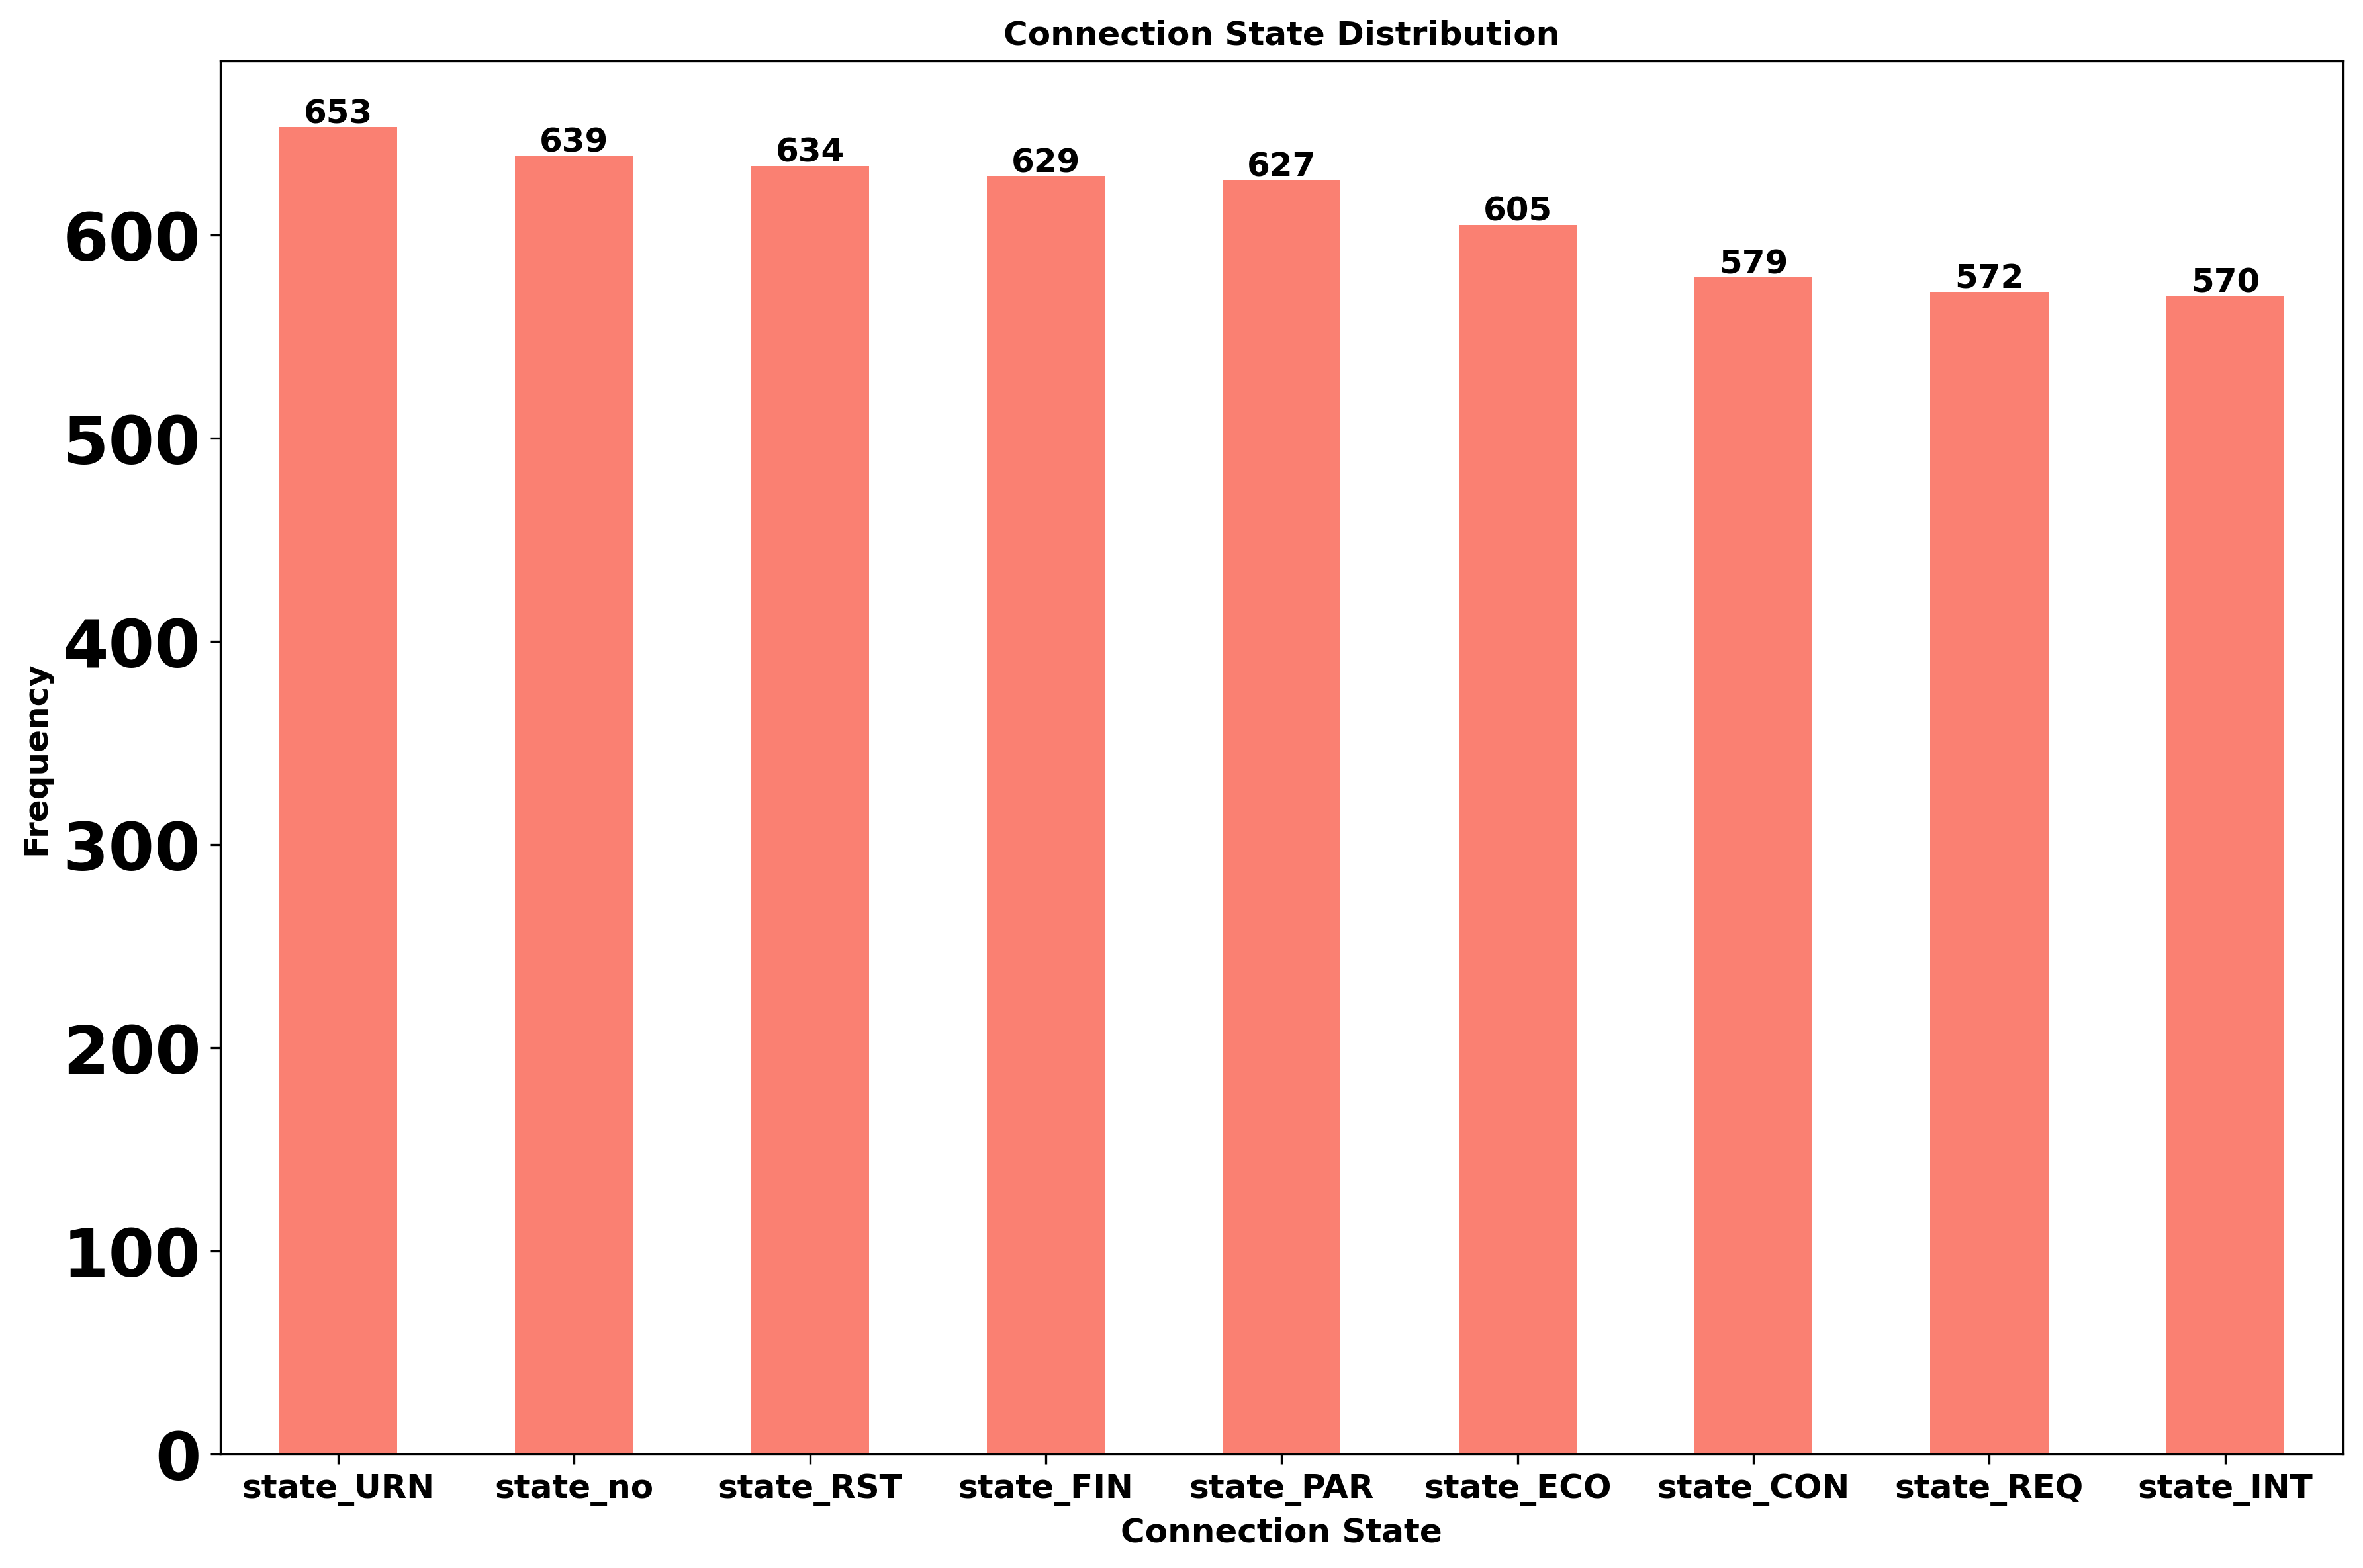

In [14]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and state_columns are already defined
state_columns = [col for col in df.columns if col.startswith('state_')]

# Count the occurrence of each state
state_counts = df[state_columns].sum().sort_values(ascending=False)

# Plot the state distribution
plt.figure(figsize=(12, 8))
ax = state_counts.plot(kind='bar', color='salmon')
plt.title('Connection State Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Connection State', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig('state_distribution_with_labels.png', dpi=300)
plt.show()


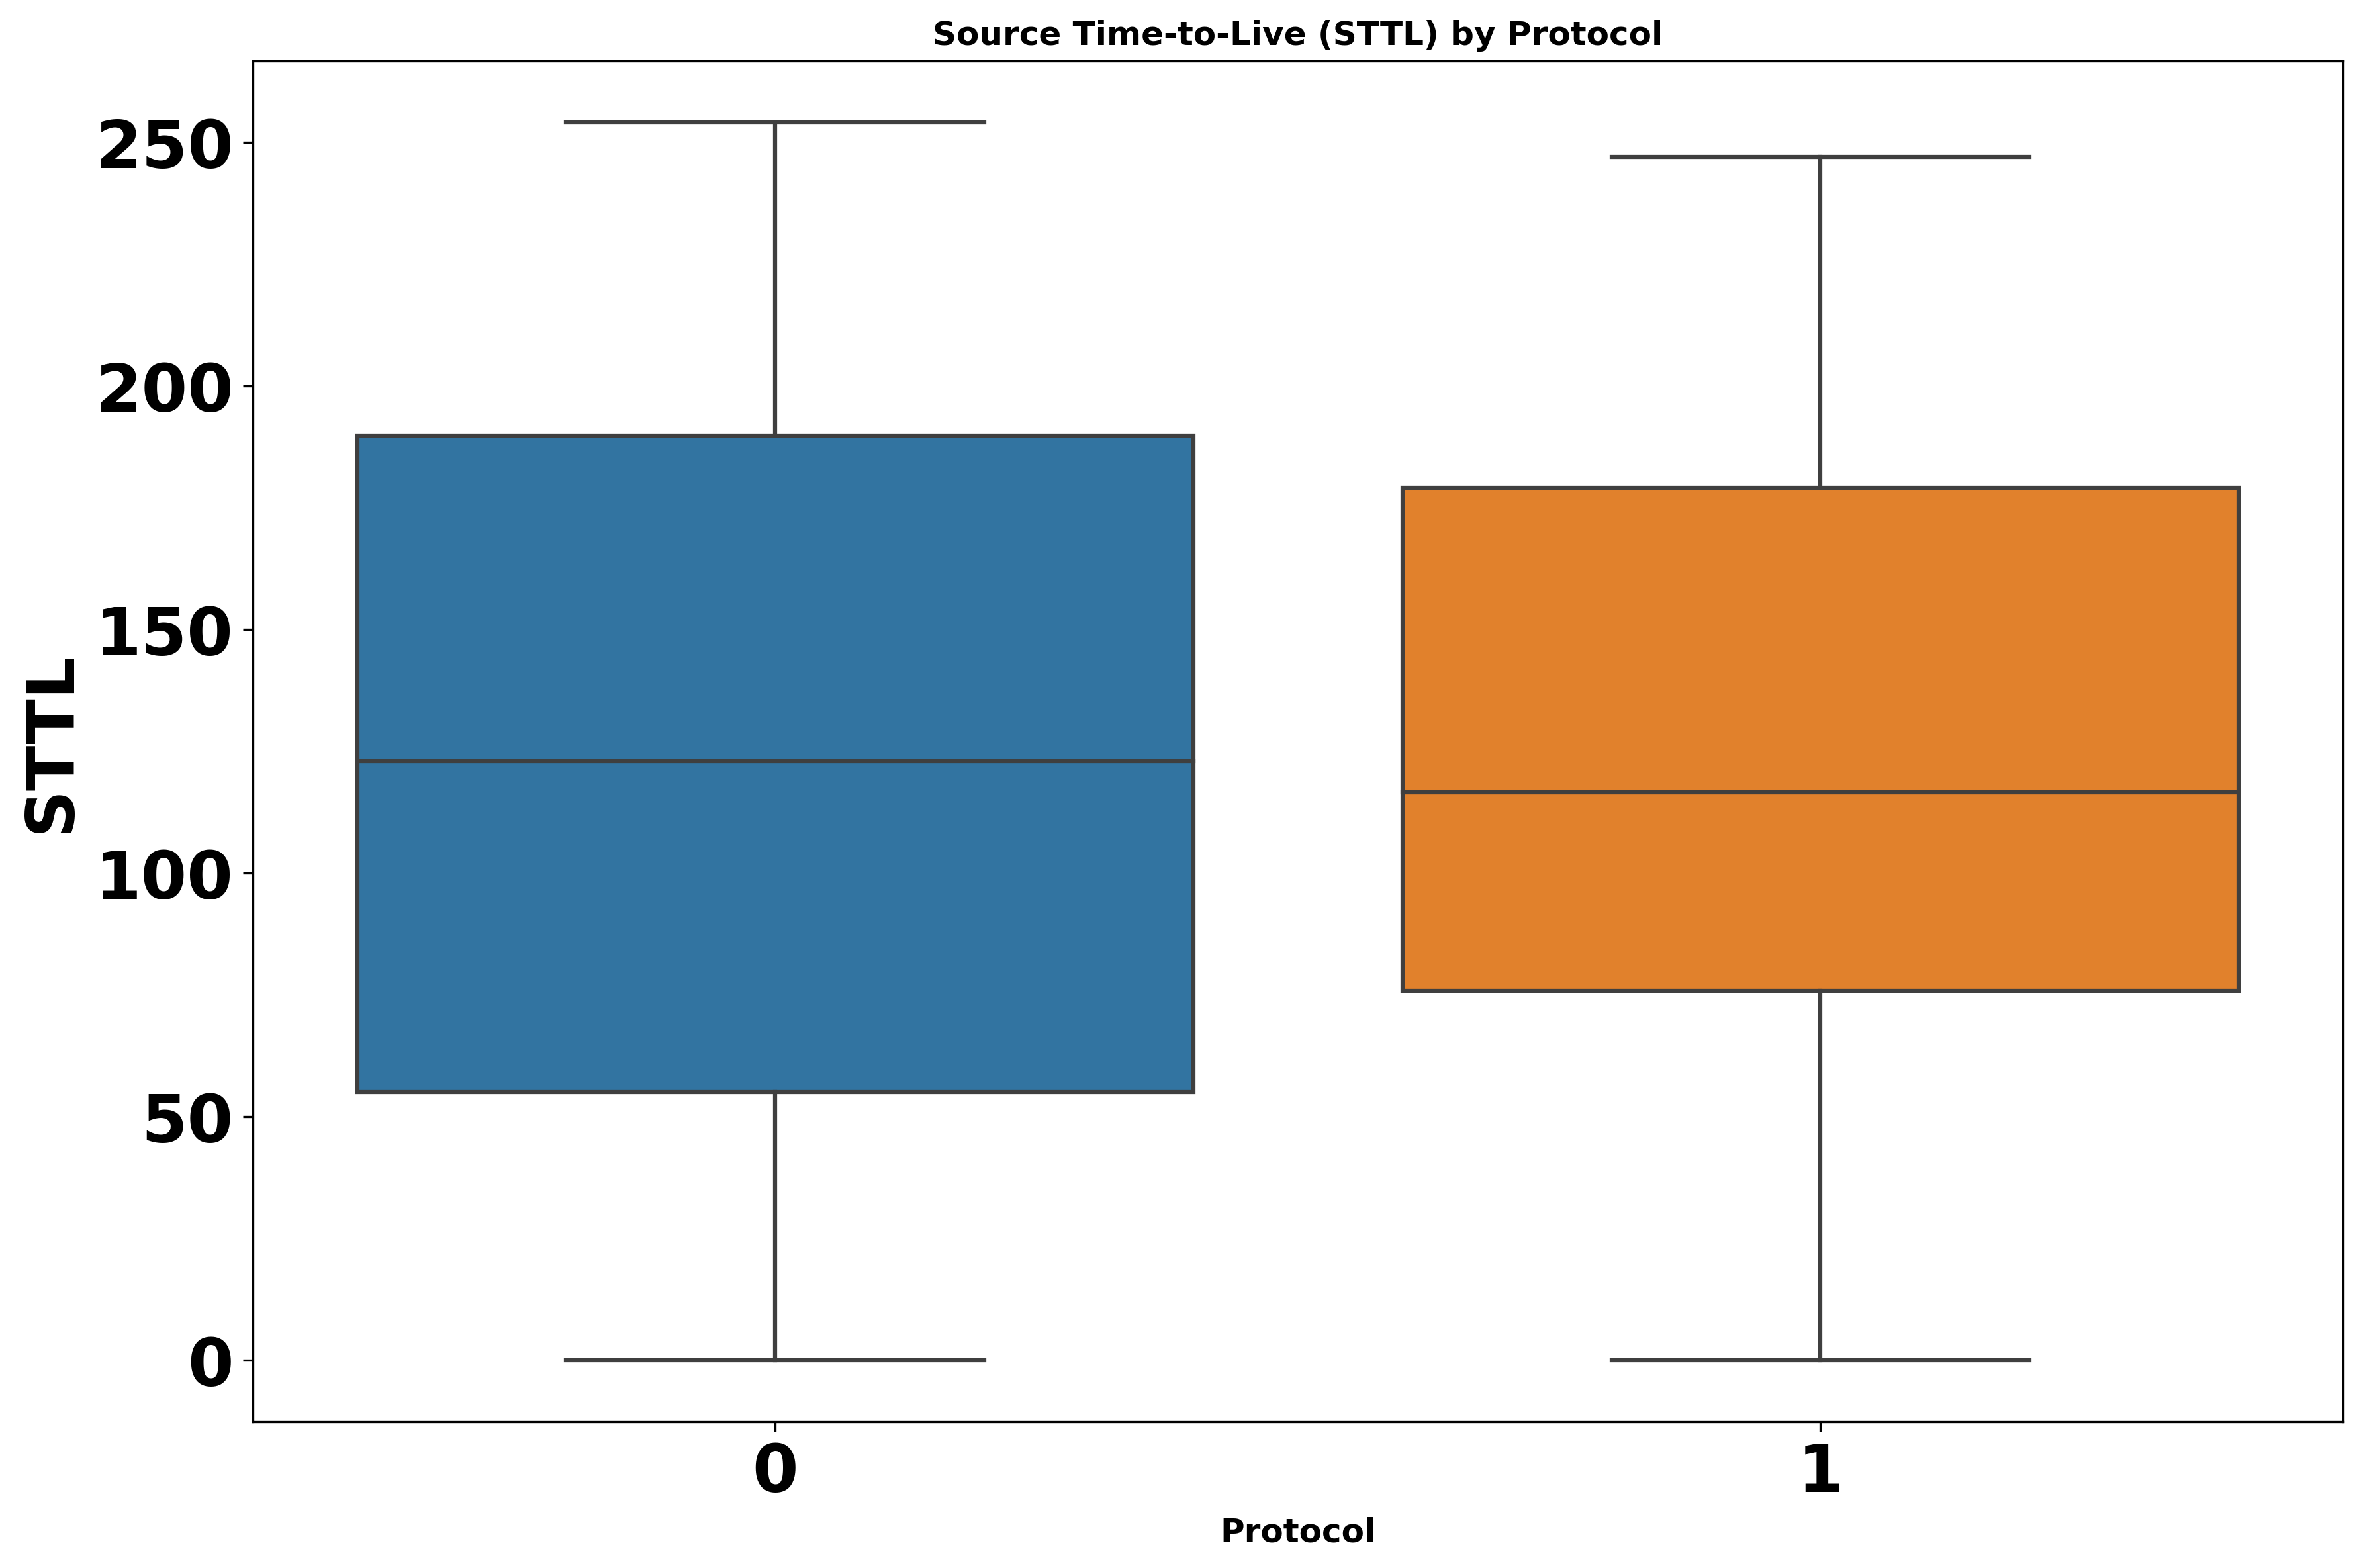

In [15]:
# Boxplot for Time-to-Live (TTL) by Protocol
plt.figure(figsize=(12, 8))
sns.boxplot(x='proto_tcp', y='sttl', data=df)  # Assuming 'proto_tcp' is one of the protocol columns
plt.title('Source Time-to-Live (STTL) by Protocol', fontsize=12, fontweight='bold')
plt.xlabel('Protocol', fontsize=12, fontweight='bold')
plt.ylabel('STTL', fontsize=24, fontweight='bold')
plt.tight_layout()
plt.savefig('ttl_by_protocol.png', dpi=300)
plt.show()


In [16]:
import pandas as pd

# Assuming 'df' is your DataFrame
if 'proto_ssl' in df.columns:
    print("The column exists.")
else:
    print("The column does not exist.")


The column does not exist.


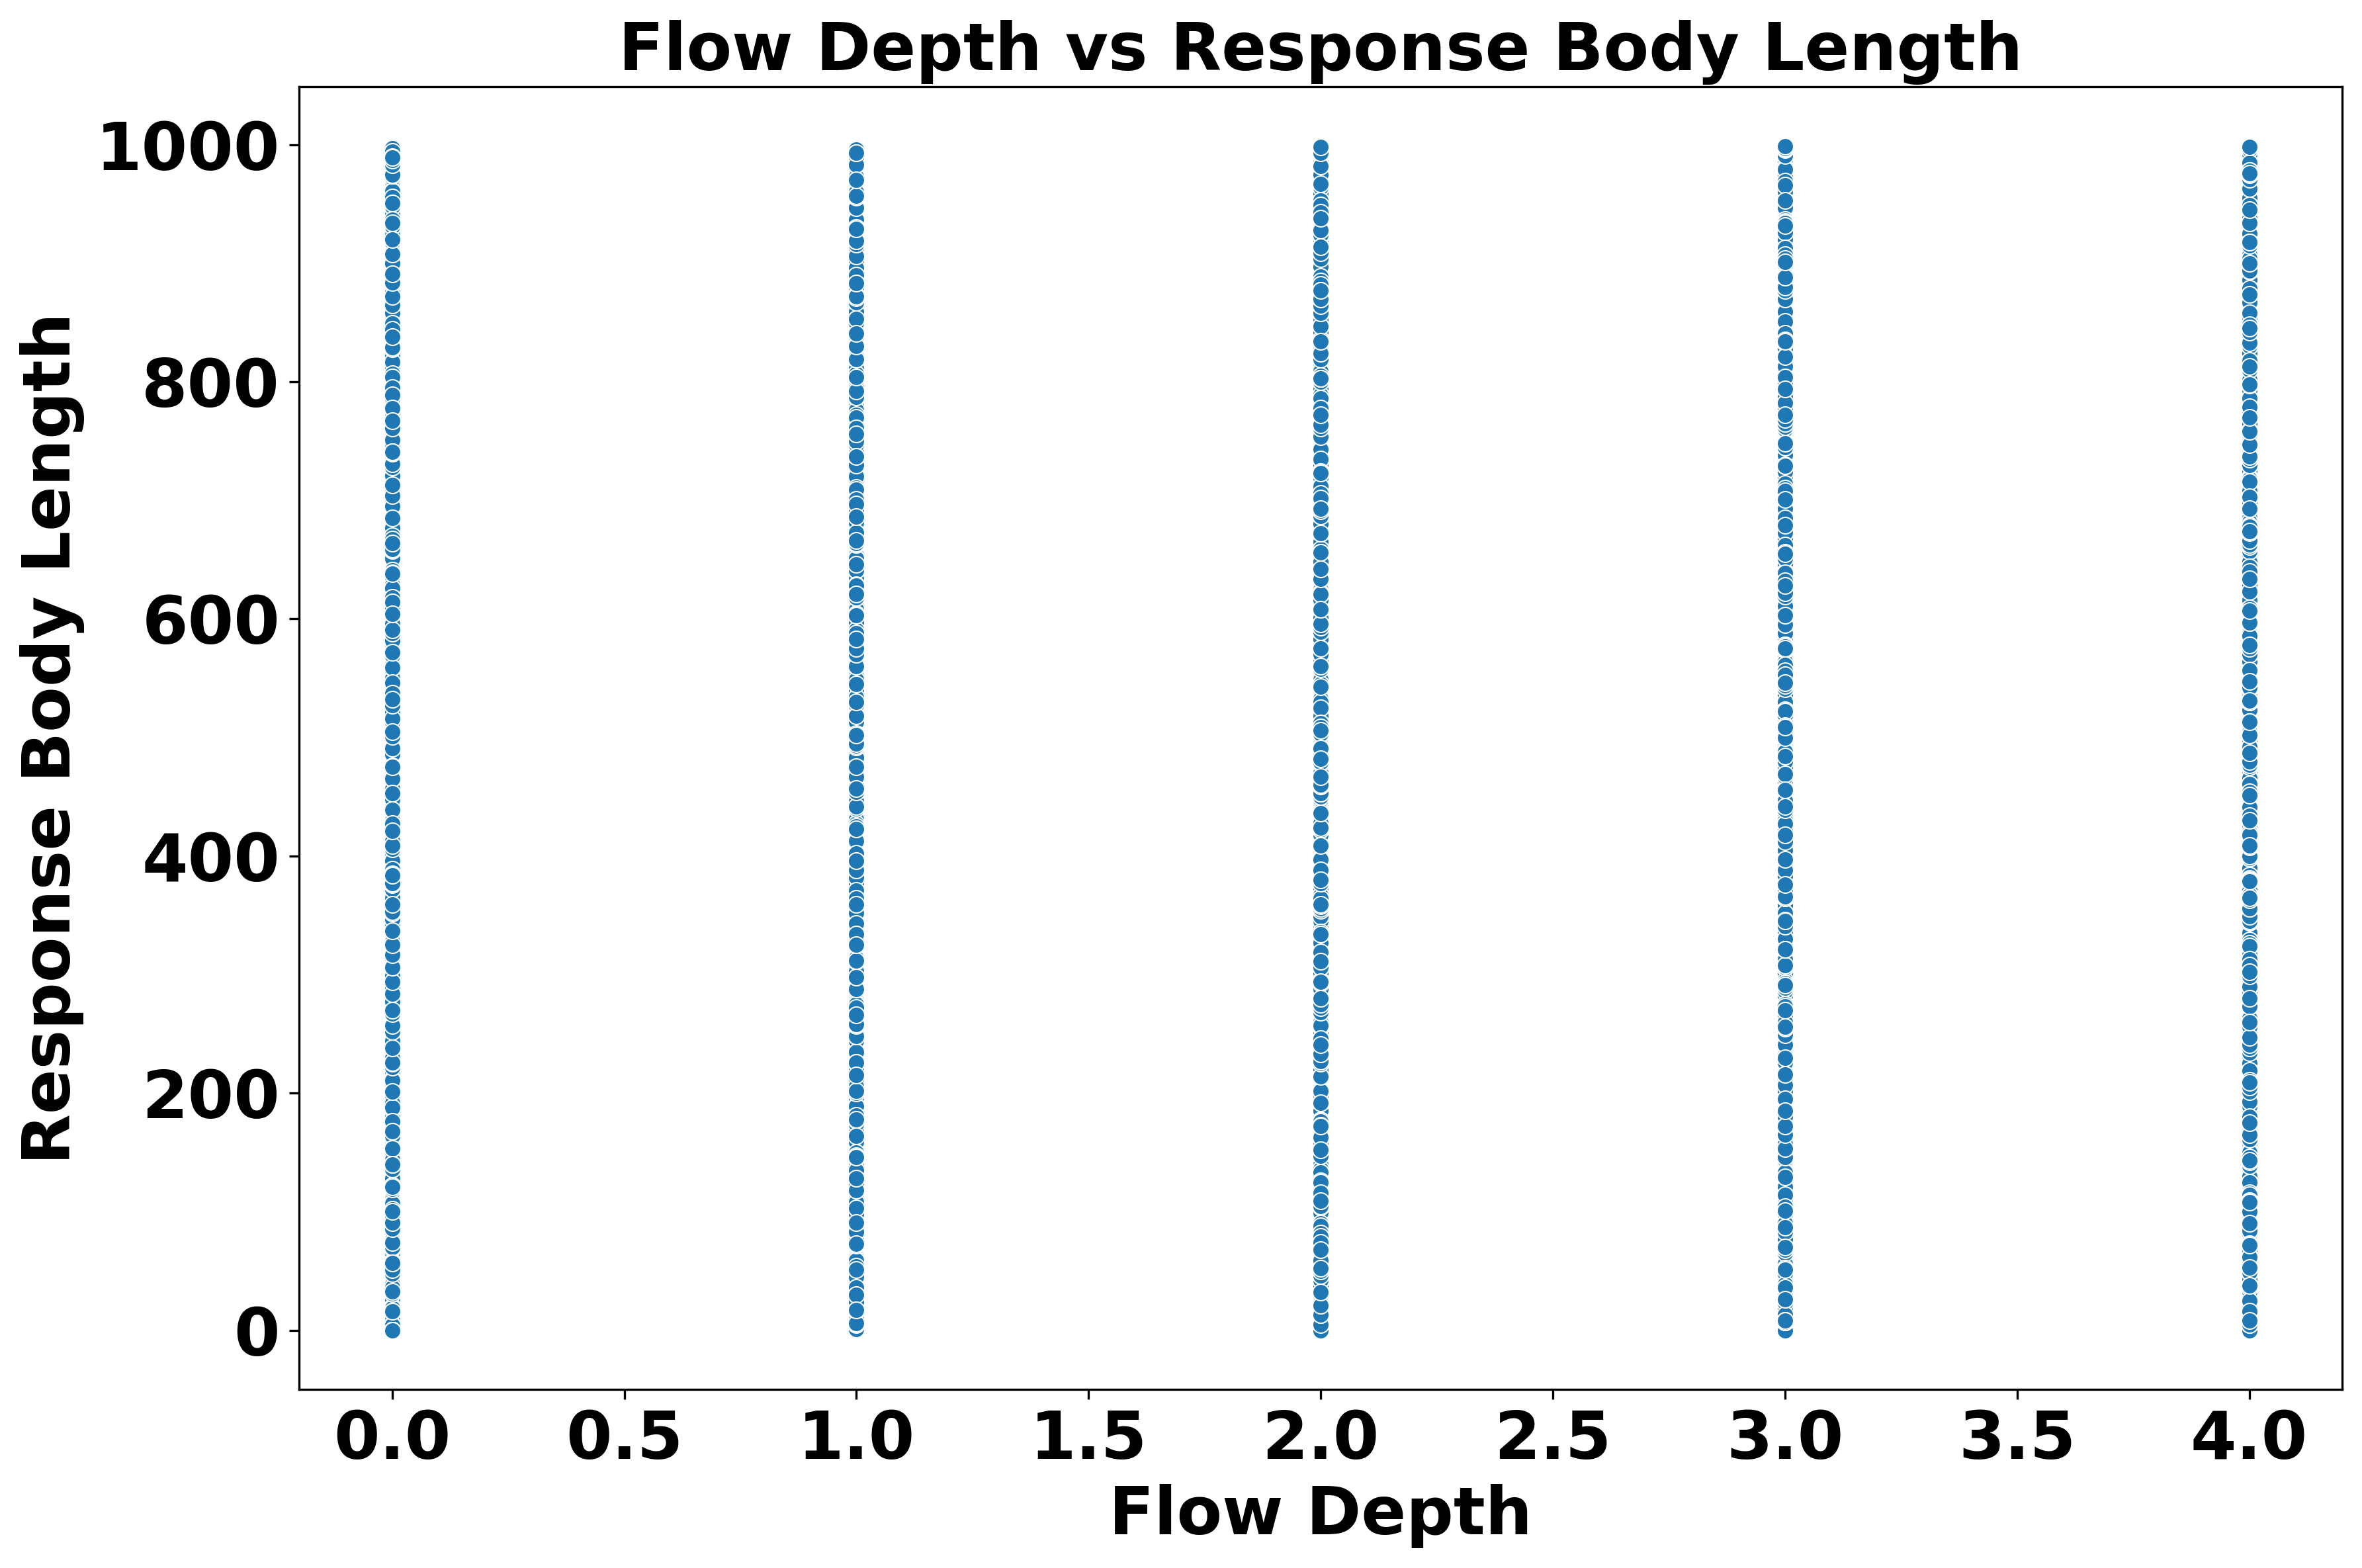

In [17]:
# Scatter plot for Flow Depth vs Response Body Length
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='trans_depth', y='response_body_len')
plt.title('Flow Depth vs Response Body Length', fontsize=24, fontweight='bold')
plt.xlabel('Flow Depth', fontsize=24, fontweight='bold')
plt.ylabel('Response Body Length', fontsize=24, fontweight='bold')
plt.tight_layout()
plt.savefig('flow_depth_vs_response_body_len.png', dpi=300)
plt.show()


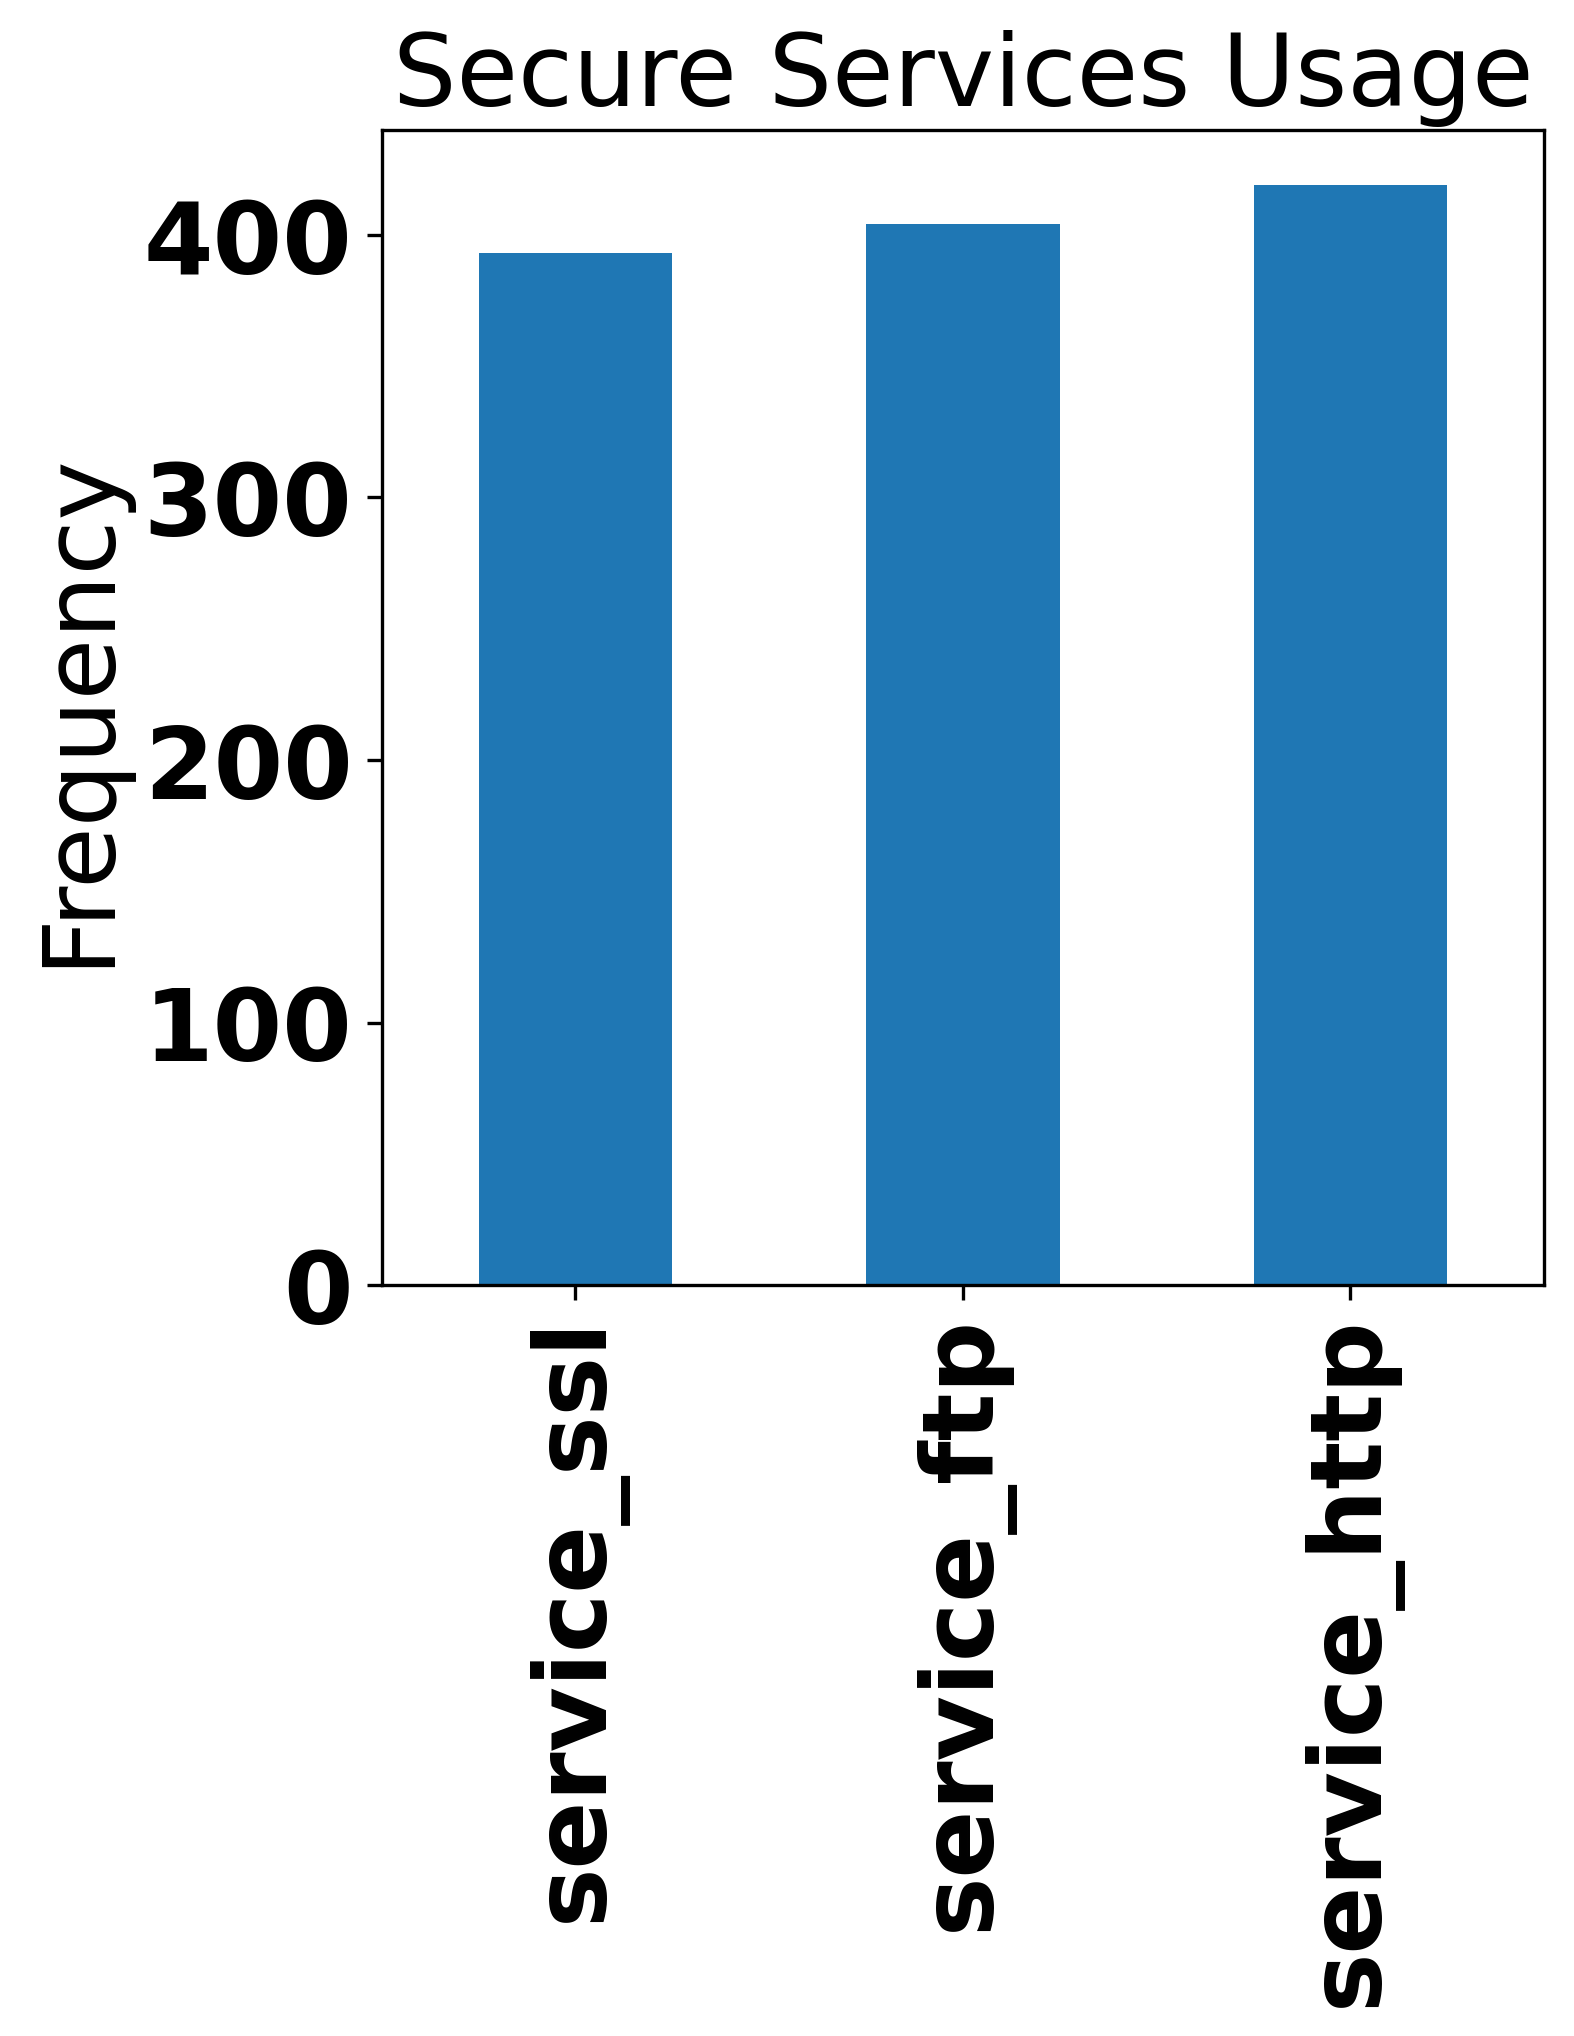

In [20]:
protocol_columns = ['proto_tcp']
service_columns = ['service_ssl', 'service_ftp', 'service_http']

# Count secure protocols and services
secure_protocols = df[protocol_columns].sum(axis=0)
secure_services = df[service_columns].sum(axis=0)

# Bar chart for protocols and services
# plt.figure(figsize=(5,5))
# secure_protocols.plot(kind='bar', title='Secure Protocols Usage', ylabel='Frequency', fontsize=12)
# plt.show()
plt.figure(figsize=(5,5))
secure_services.plot(kind='bar', title='Secure Services Usage', ylabel='Frequency')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.savefig('state_distribution_with_labels.png', dpi=300)
plt.show()
# # 2. Performance Metrics
# performance_columns = ['rate', 'sload', 'dload', 'tcprtt']
# secure_df = df[df['proto_ssl'] == 1]  # Filter for SSL-secured communications
# non_secure_df = df[df['proto_ssl'] == 0]

# # Boxplot comparison
# for col in performance_columns:
#     sns.boxplot(data=df, x='proto_ssl', y=col)
#     plt.title(f'{col} Distribution (Secure vs Non-Secure)')
#     plt.xlabel('Secure (1 = Yes, 0 = No)')
#     plt.ylabel(col)
#     plt.show()

# # 3. Connection State Analysis
# state_columns = [col for col in df.columns if col.startswith('state_')]
# state_usage = df[state_columns].sum(axis=0)

# # Bar chart for connection states
# state_usage.plot(kind='bar', title='Connection States Usage', ylabel='Frequency')
# plt.show()

# # 4. Correlation Heatmap
# cryptographic_features = protocol_columns + service_columns + performance_columns + ['label']
# correlation_matrix = df[cryptographic_features].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# # 5. Outcome Analysis
# sns.countplot(data=secure_df, x='label')
# plt.title('Outcome Distribution for Secure Protocols')
# plt.show()

# sns.countplot(data=non_secure_df, x='label')
# plt.title('Outcome Distribution for Non-Secure Protocols')
# plt.show()

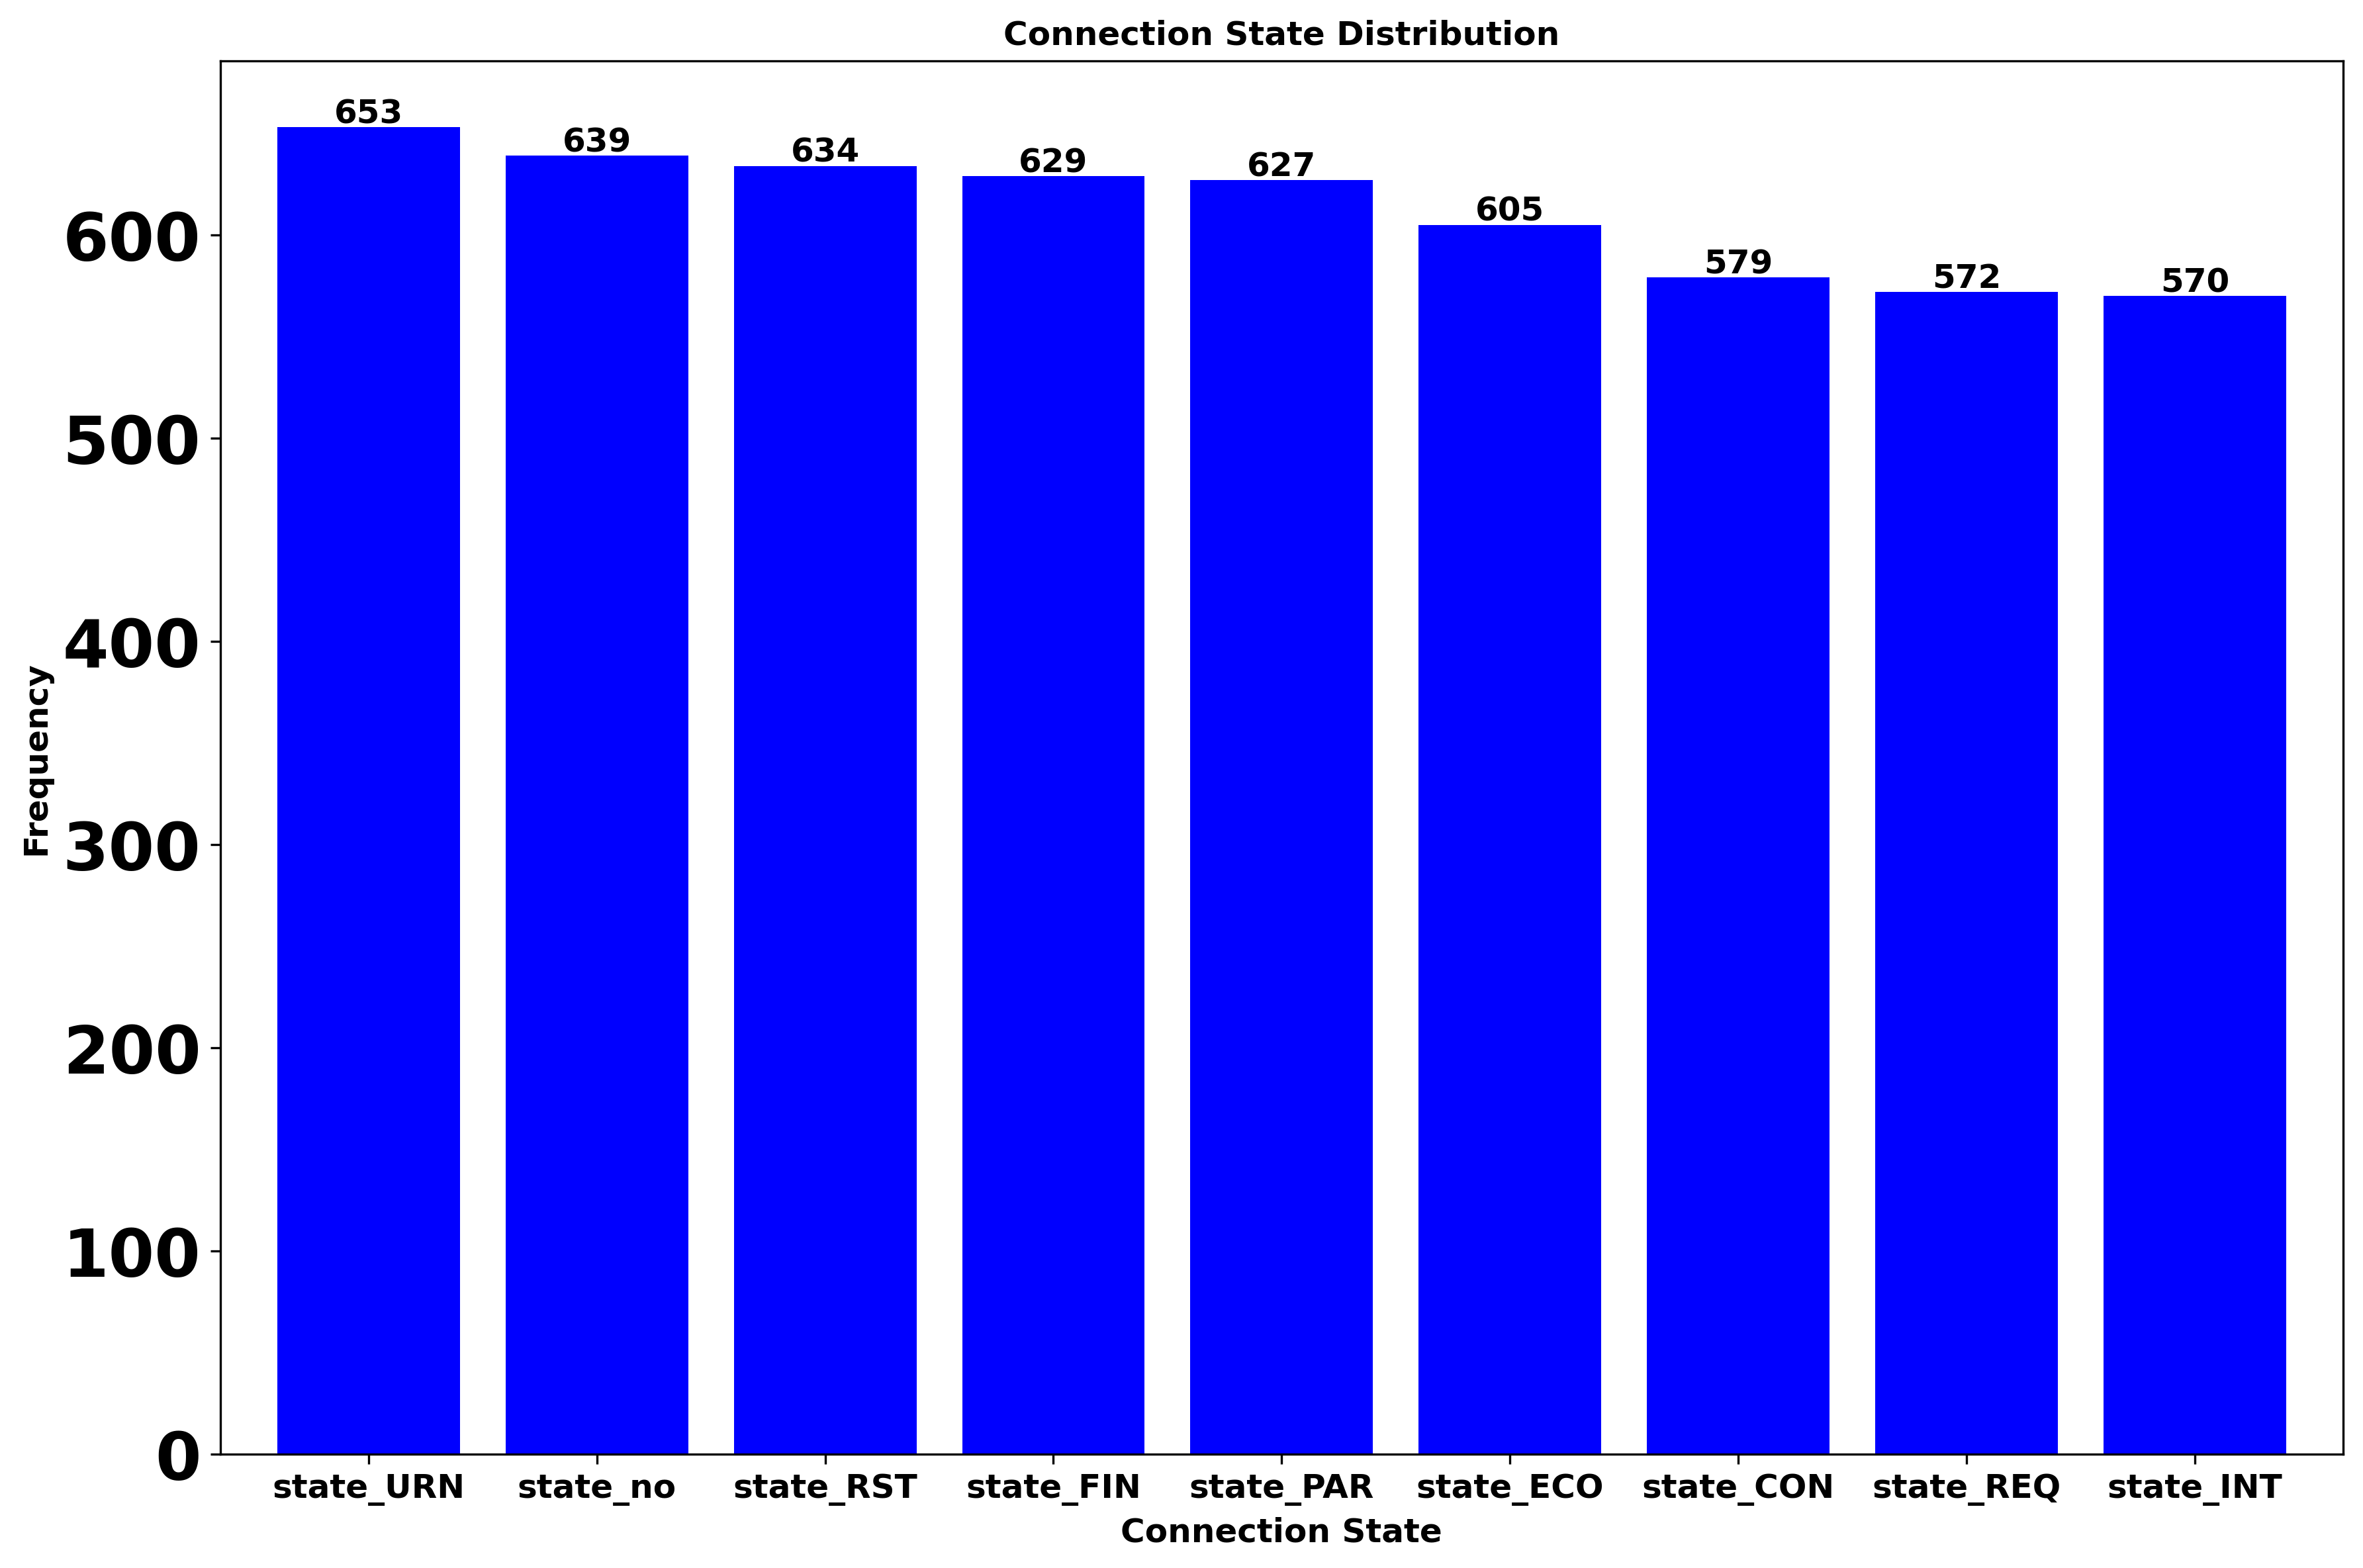

In [19]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and state_columns are already defined
state_columns = [col for col in df.columns if col.startswith('state_')]

# Count the occurrence of each state
state_counts = df[state_columns].sum().sort_values(ascending=False)

# Plot the state distribution
plt.figure(figsize=(12, 8))
ax = state_counts.plot(kind='bar', color='blue', width=0.8)  # Set bars to blue and increase width

plt.title('Connection State Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Connection State', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig('state_distribution_with_labels.png', dpi=300)
plt.show()


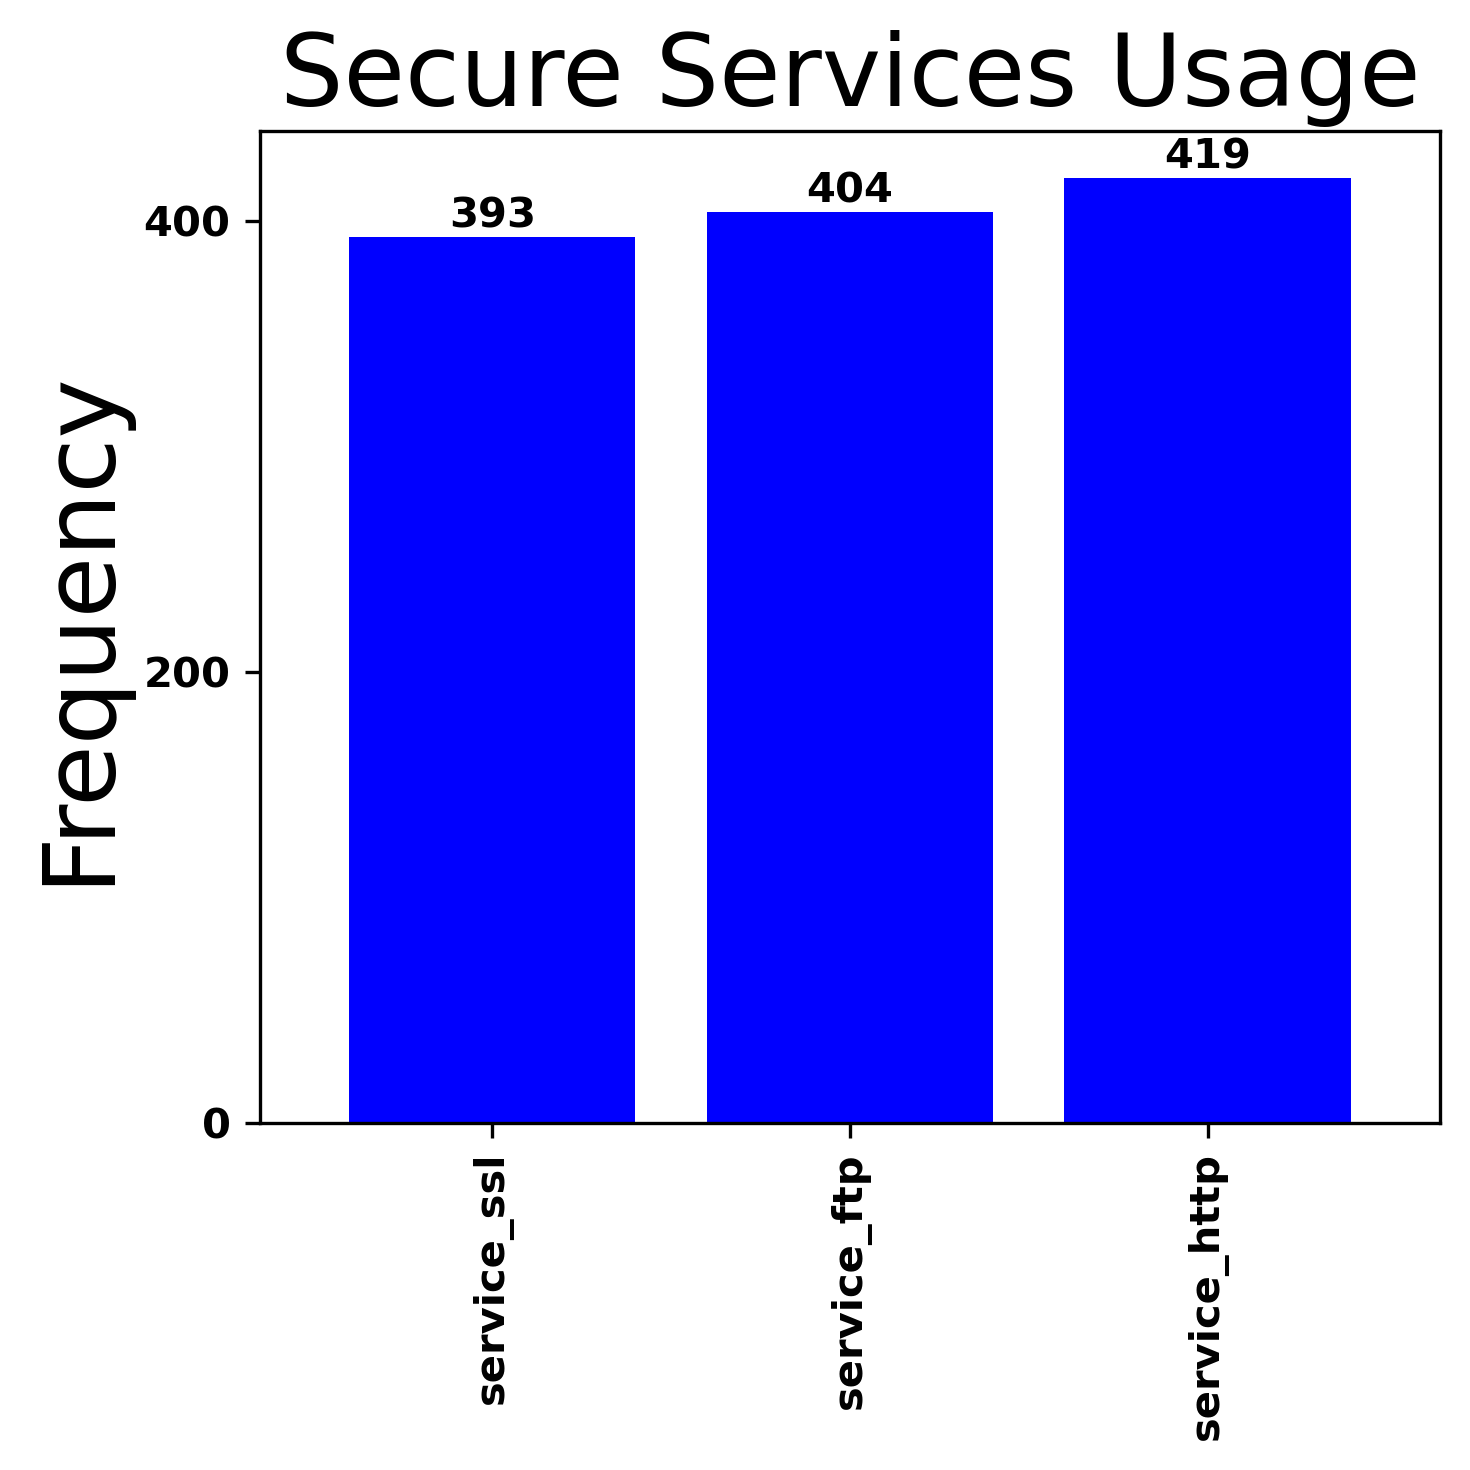

In [22]:
import matplotlib.pyplot as plt

# Assuming secure_services is a pandas Series or DataFrame with frequency data
service_columns = ['service_ssl', 'service_ftp', 'service_http']

plt.figure(figsize=(5, 5))
ax = secure_services.plot(kind='bar', color='blue', width=0.8,  # Blue bars and increased width
                          title='Secure Services Usage', ylabel='Frequency', fontsize=10)

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig('secure_services_usage.png', dpi=300)  # Save the plot as a PNG file
plt.show()
